In [1]:
import numpy as np
import matplotlib.pyplot as plt

from frqi import FRQI
from qiskit import execute, transpile
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister, Parameter
from qiskit.circuit.library.standard_gates import RYGate
from qiskit.providers.aer.backends import AerSimulator
from qiskit.quantum_info import DensityMatrix, state_fidelity, partial_trace
from qiskit.visualization import plot_histogram
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

In [2]:
SHOTS = 8192
BACKEND = AerSimulator()
image_frqi = FRQI()

In [3]:
mcry = RYGate(theta=2*Parameter(r"$\theta$")).control(num_ctrl_qubits=2)

In [4]:
ry_qc = QuantumCircuit(1)
ry_qc.ry(theta=2*Parameter(r"$\theta$"), qubit=0)
mcry_alt = ry_qc.to_gate(label="mcry").control(num_ctrl_qubits=2)

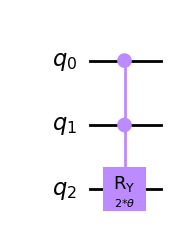

In [5]:
test = QuantumCircuit(3)
test.append(mcry, [0,1,2])
test.draw(output="mpl")

In [6]:
qubits = QuantumRegister(size=2, name="pixels")
color_qubit = QuantumRegister(size=1, name="color")
bits = ClassicalRegister(size=2, name="bits_pixels")
color_bit = ClassicalRegister(size=1)

qc = QuantumCircuit(qubits, color_qubit, bits, color_bit)

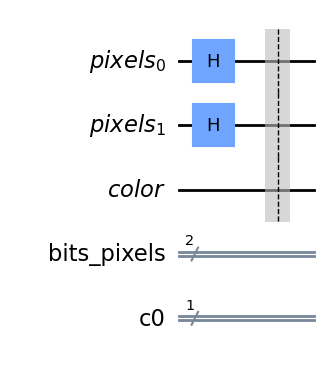

In [7]:
qc.h(qubit=qubits)
qc.barrier()
qc.draw(output="mpl")

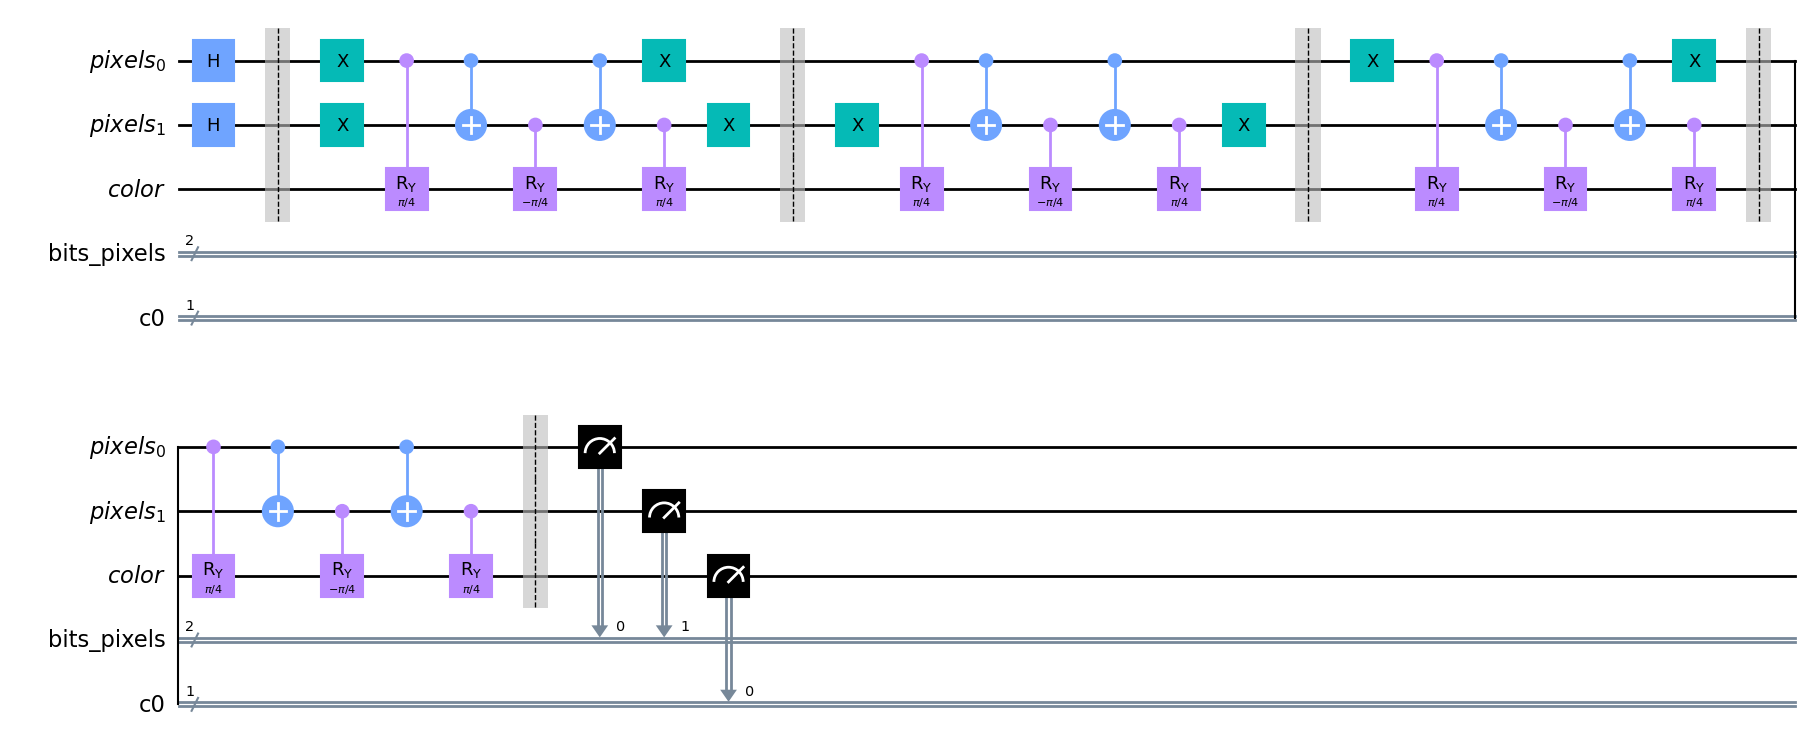

In [8]:
theta = np.pi/4

for i in range(4):
    if i == 0:
        qc.x(qubit=qubits)
    elif i == 1:
        qc.x(qubit=qubits[1])
    elif i == 2:
        qc.x(qubit=qubits[0])
    qc.cry(theta=theta, control_qubit=qubits[0], target_qubit=color_qubit)
    qc.cx(control_qubit=qubits[0], target_qubit=qubits[1])
    qc.cry(theta=-theta, control_qubit=qubits[1], target_qubit=color_qubit)
    qc.cx(control_qubit=qubits[0], target_qubit=qubits[1])
    qc.cry(theta=theta, control_qubit=qubits[1], target_qubit=color_qubit)
    if i == 0:
        qc.x(qubit=qubits)
    elif i == 1:
        qc.x(qubit=qubits[1])
    elif i == 2:
        qc.x(qubit=qubits[0])
    qc.barrier()
    
qc.measure(qubit=qubits, cbit=bits)
qc.measure(qubit=color_qubit, cbit=color_bit)
qc.draw(output="mpl")

In [9]:
print("Circuit dimensions")
print(f"Circuit depth: {qc.depth()}")
print(f"Circuit size: {qc.size()}")
print(f"Circuit operations: {qc.count_ops()}")

Circuit dimensions
Circuit depth: 26
Circuit size: 33
Circuit operations: OrderedDict([('cry', 12), ('x', 8), ('cx', 8), ('barrier', 5), ('measure', 3), ('h', 2)])


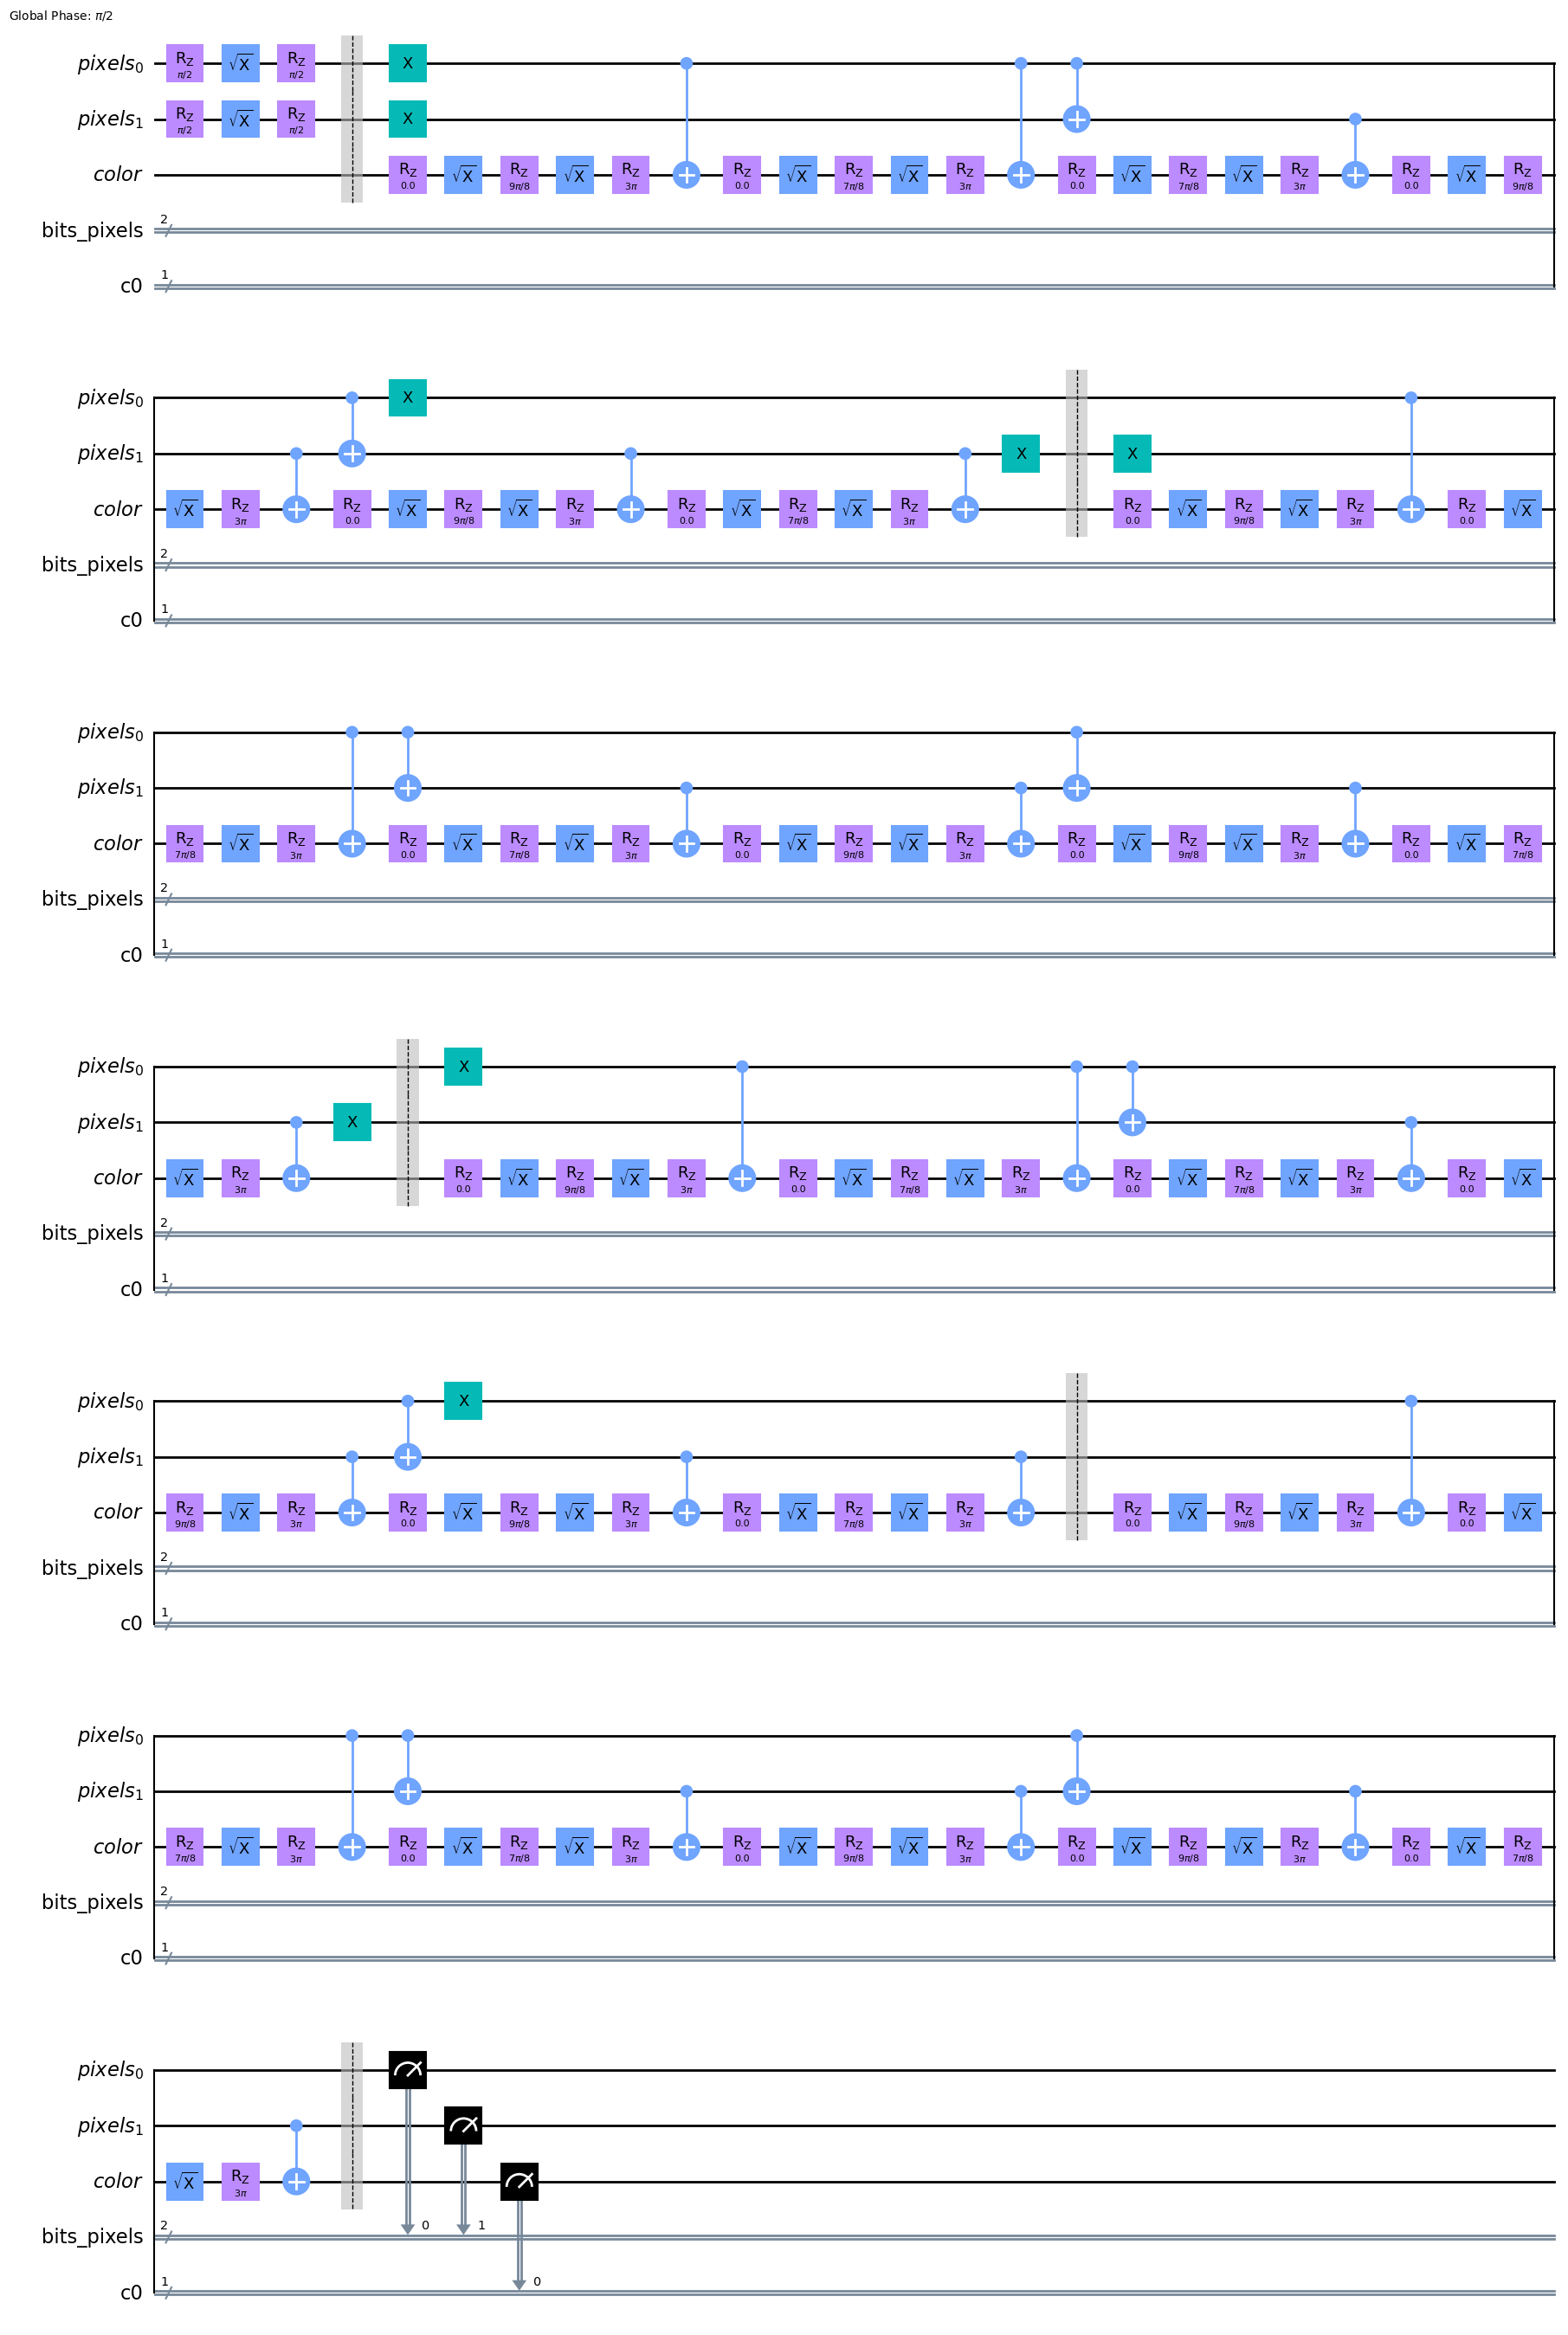

In [10]:
transpiled_qc = transpile(circuits=qc, basis_gates=["id", "x", "sx", "cx", "rz"], optimization_level=0)
transpiled_qc.draw(output="mpl")

In [11]:
print("Circuit dimensions")
print(f"Circuit depth: {transpiled_qc.depth()}")
print(f"Circuit size: {transpiled_qc.size()}")
print(f"Circuit operations: {transpiled_qc.count_ops()}")

Circuit dimensions
Circuit depth: 150
Circuit size: 169
Circuit operations: OrderedDict([('rz', 76), ('sx', 50), ('cx', 32), ('x', 8), ('barrier', 5), ('measure', 3)])


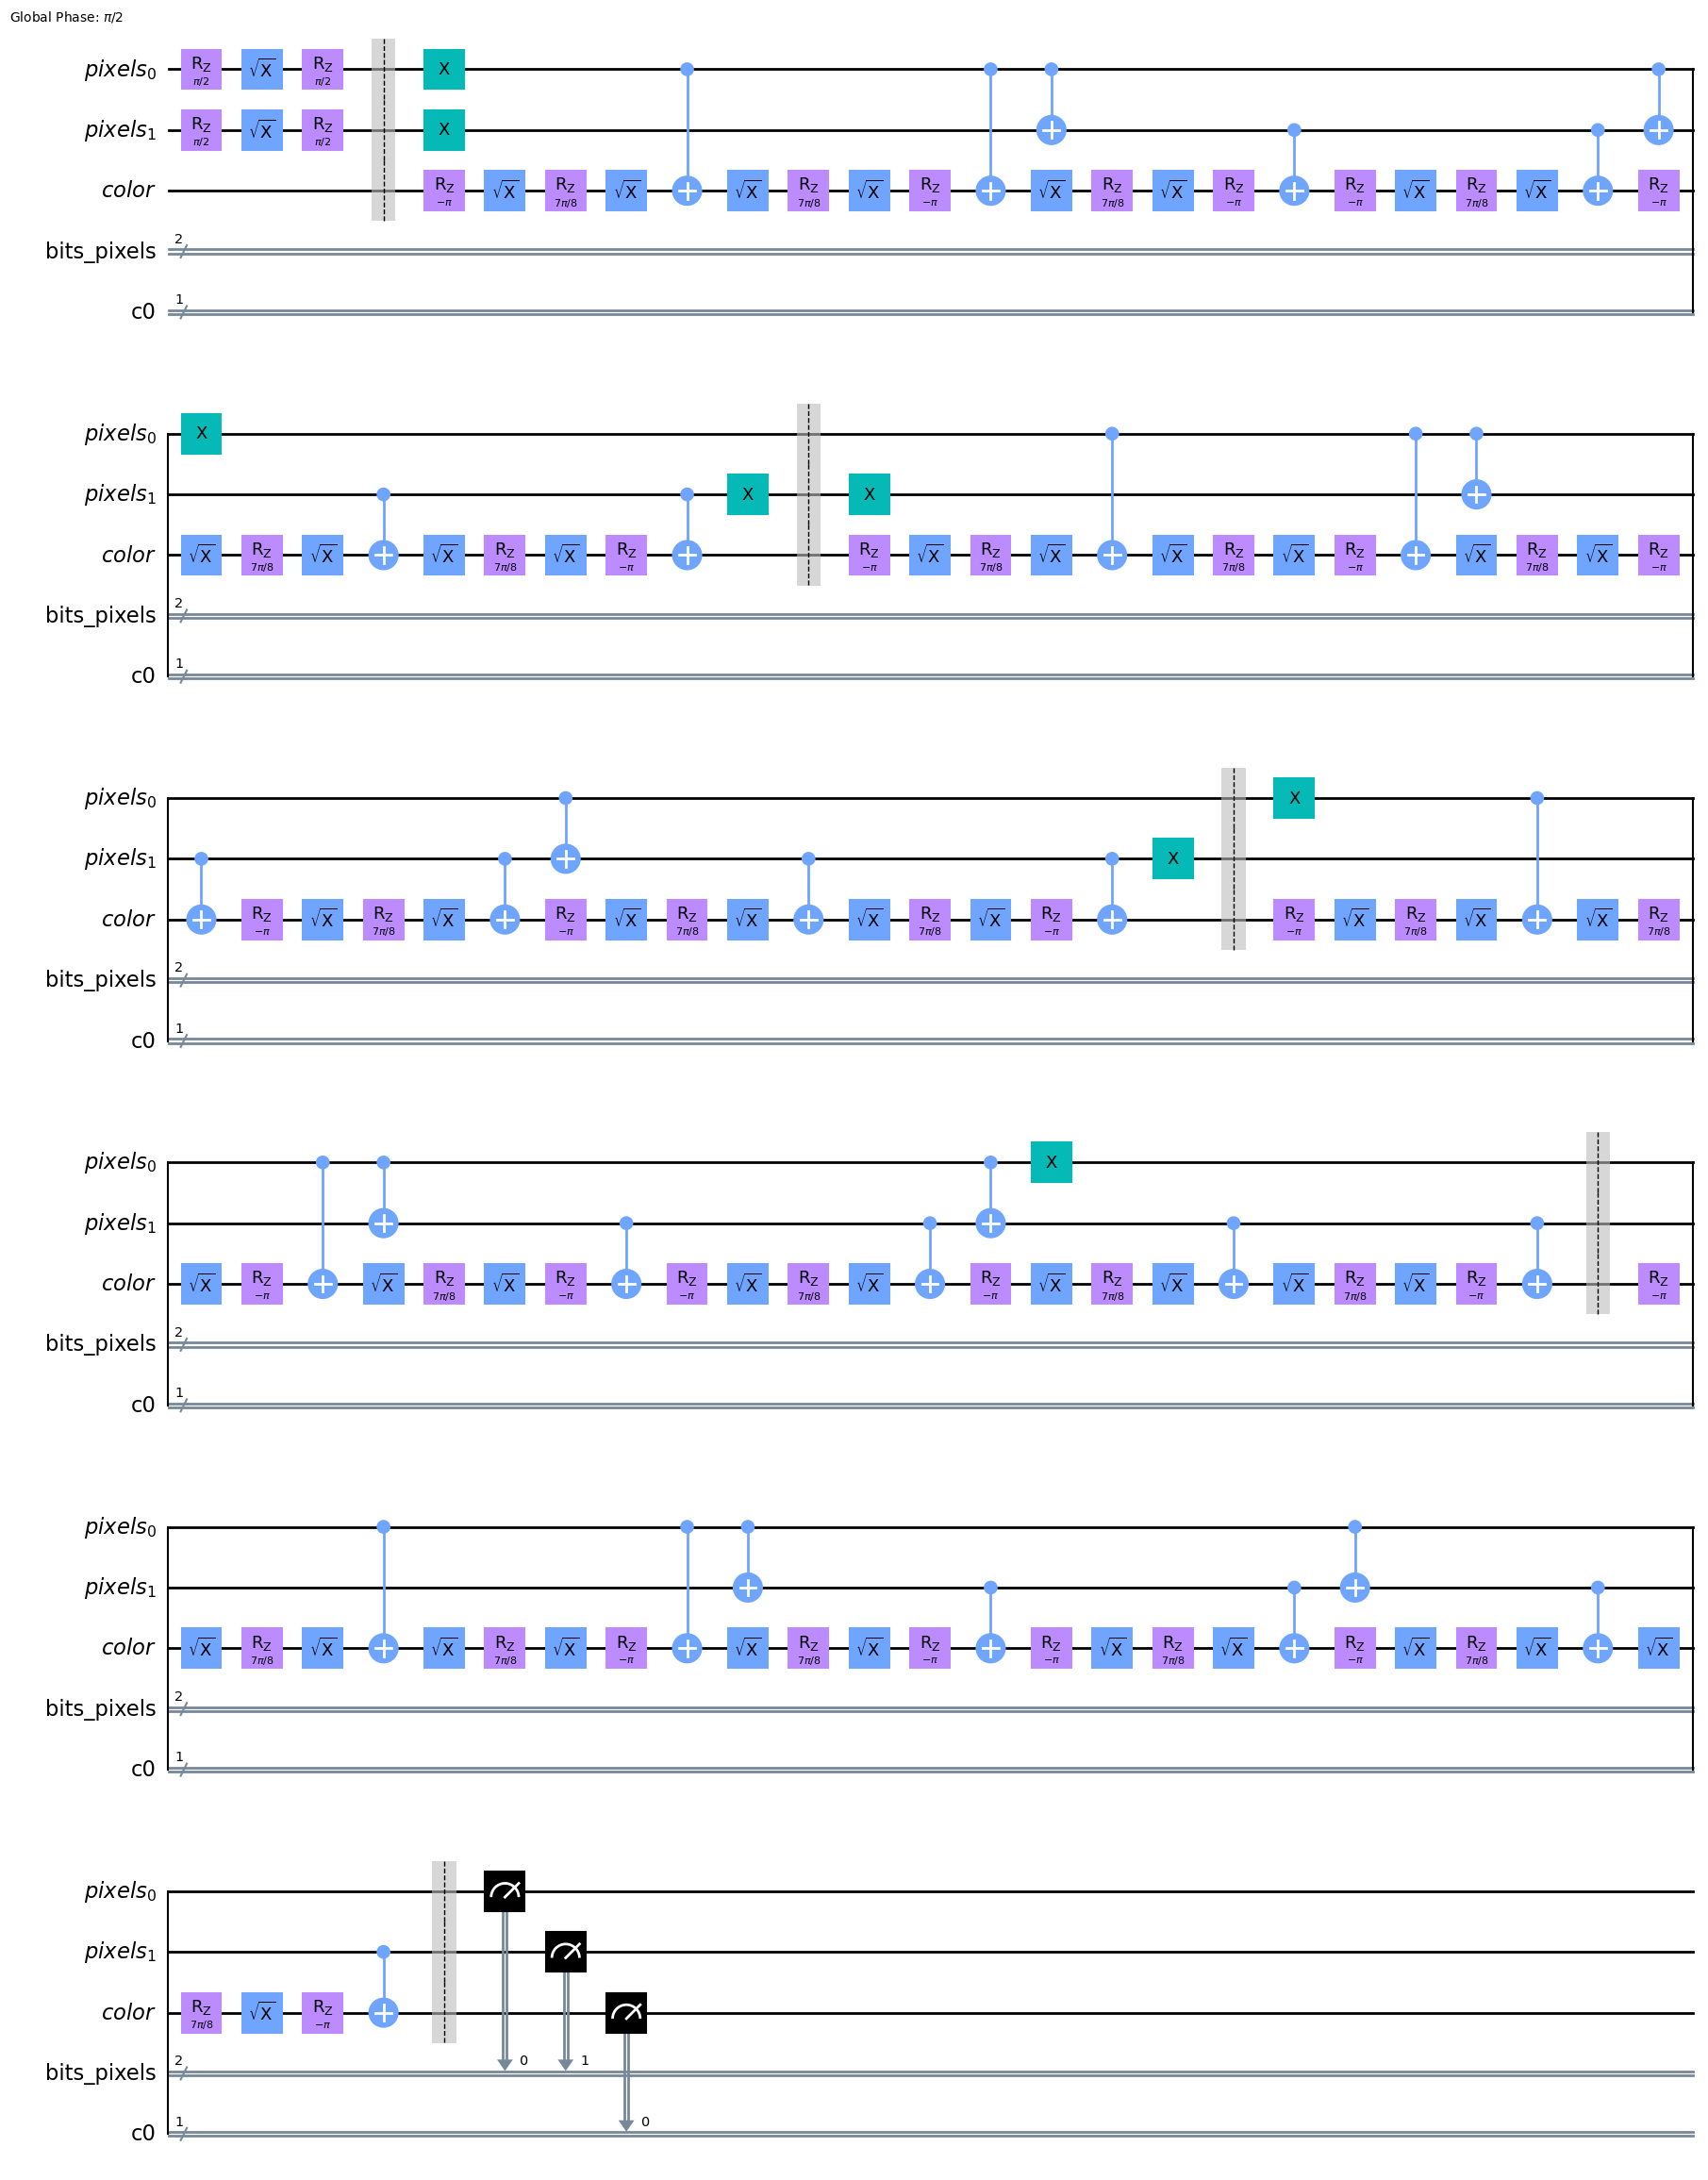

In [12]:
transpiled_qc = transpile(circuits=qc, basis_gates=["id", "x", "sx", "cx", "rz"], optimization_level=1)
transpiled_qc.draw(output="mpl")

In [13]:
print("Circuit dimensions")
print(f"Circuit depth: {transpiled_qc.depth()}")
print(f"Circuit size: {transpiled_qc.size()}")
print(f"Circuit operations: {transpiled_qc.count_ops()}")

Circuit dimensions
Circuit depth: 126
Circuit size: 145
Circuit operations: OrderedDict([('rz', 52), ('sx', 50), ('cx', 32), ('x', 8), ('barrier', 5), ('measure', 3)])


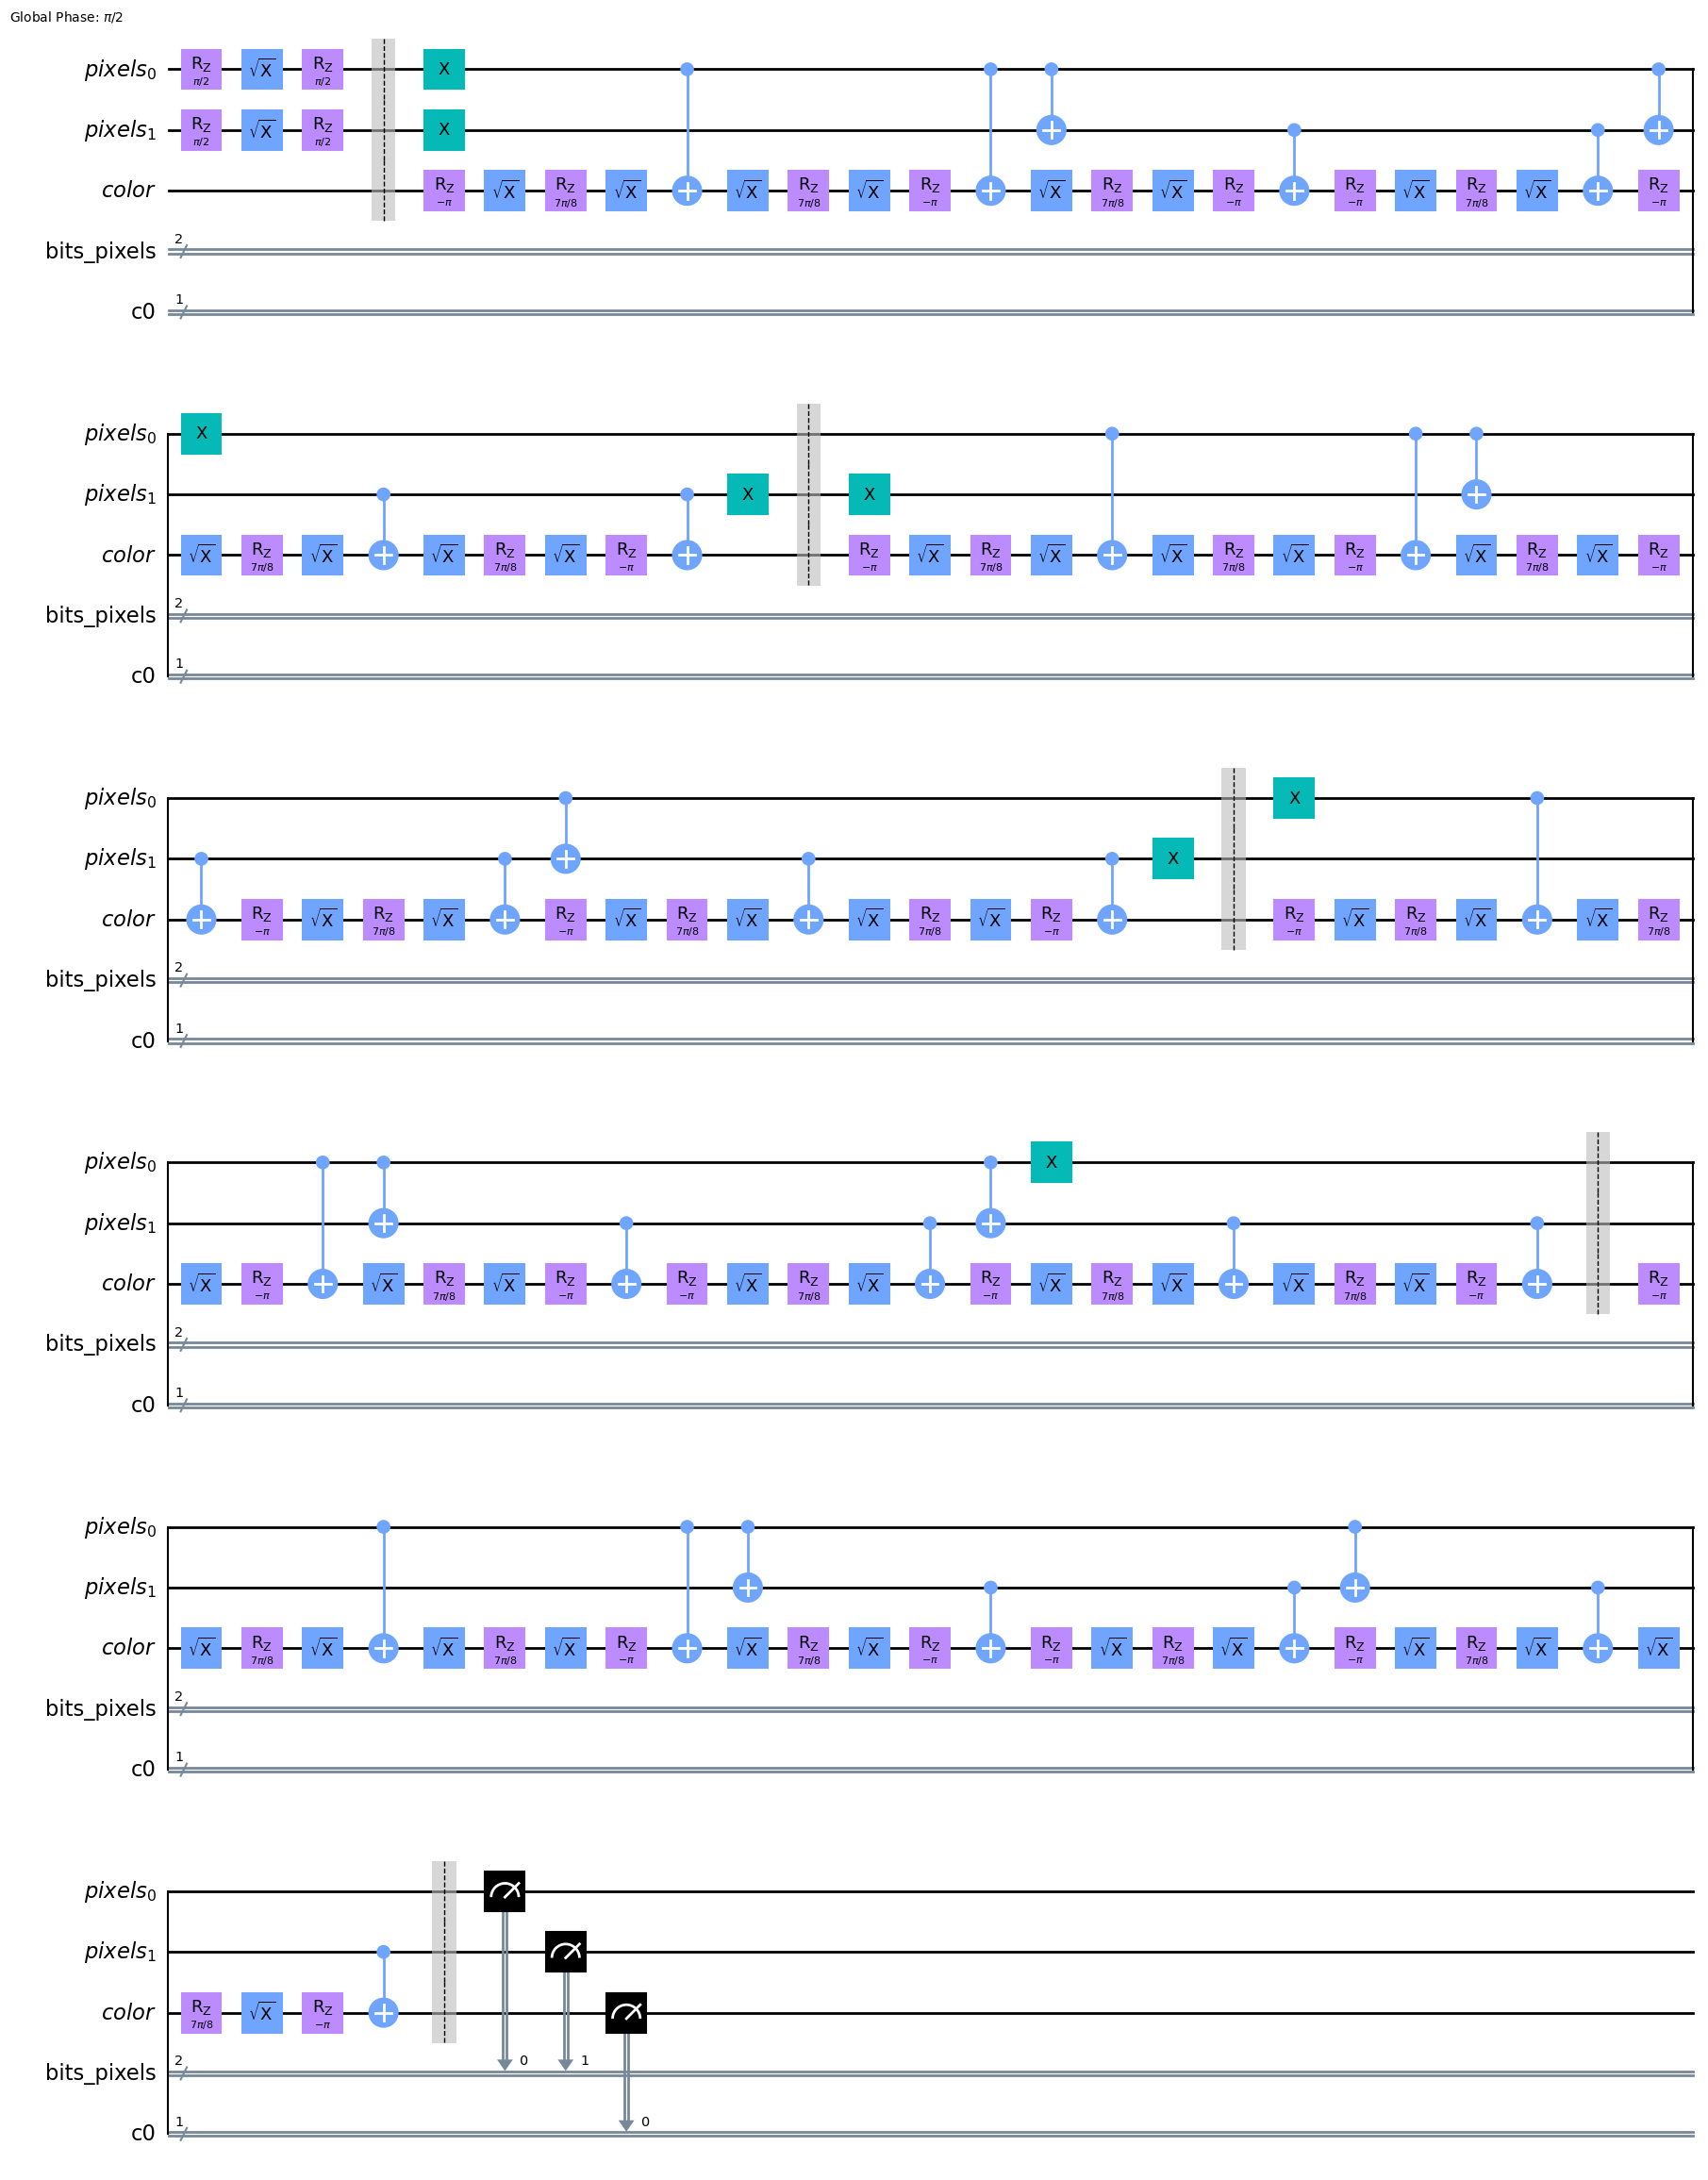

In [14]:
transpiled_qc = transpile(circuits=qc, basis_gates=["id", "x", "sx", "cx", "rz"], optimization_level=2)
transpiled_qc.draw(output="mpl")

In [15]:
print("Circuit dimensions")
print(f"Circuit depth: {transpiled_qc.depth()}")
print(f"Circuit size: {transpiled_qc.size()}")
print(f"Circuit operations: {transpiled_qc.count_ops()}")

Circuit dimensions
Circuit depth: 126
Circuit size: 145
Circuit operations: OrderedDict([('rz', 52), ('sx', 50), ('cx', 32), ('x', 8), ('barrier', 5), ('measure', 3)])


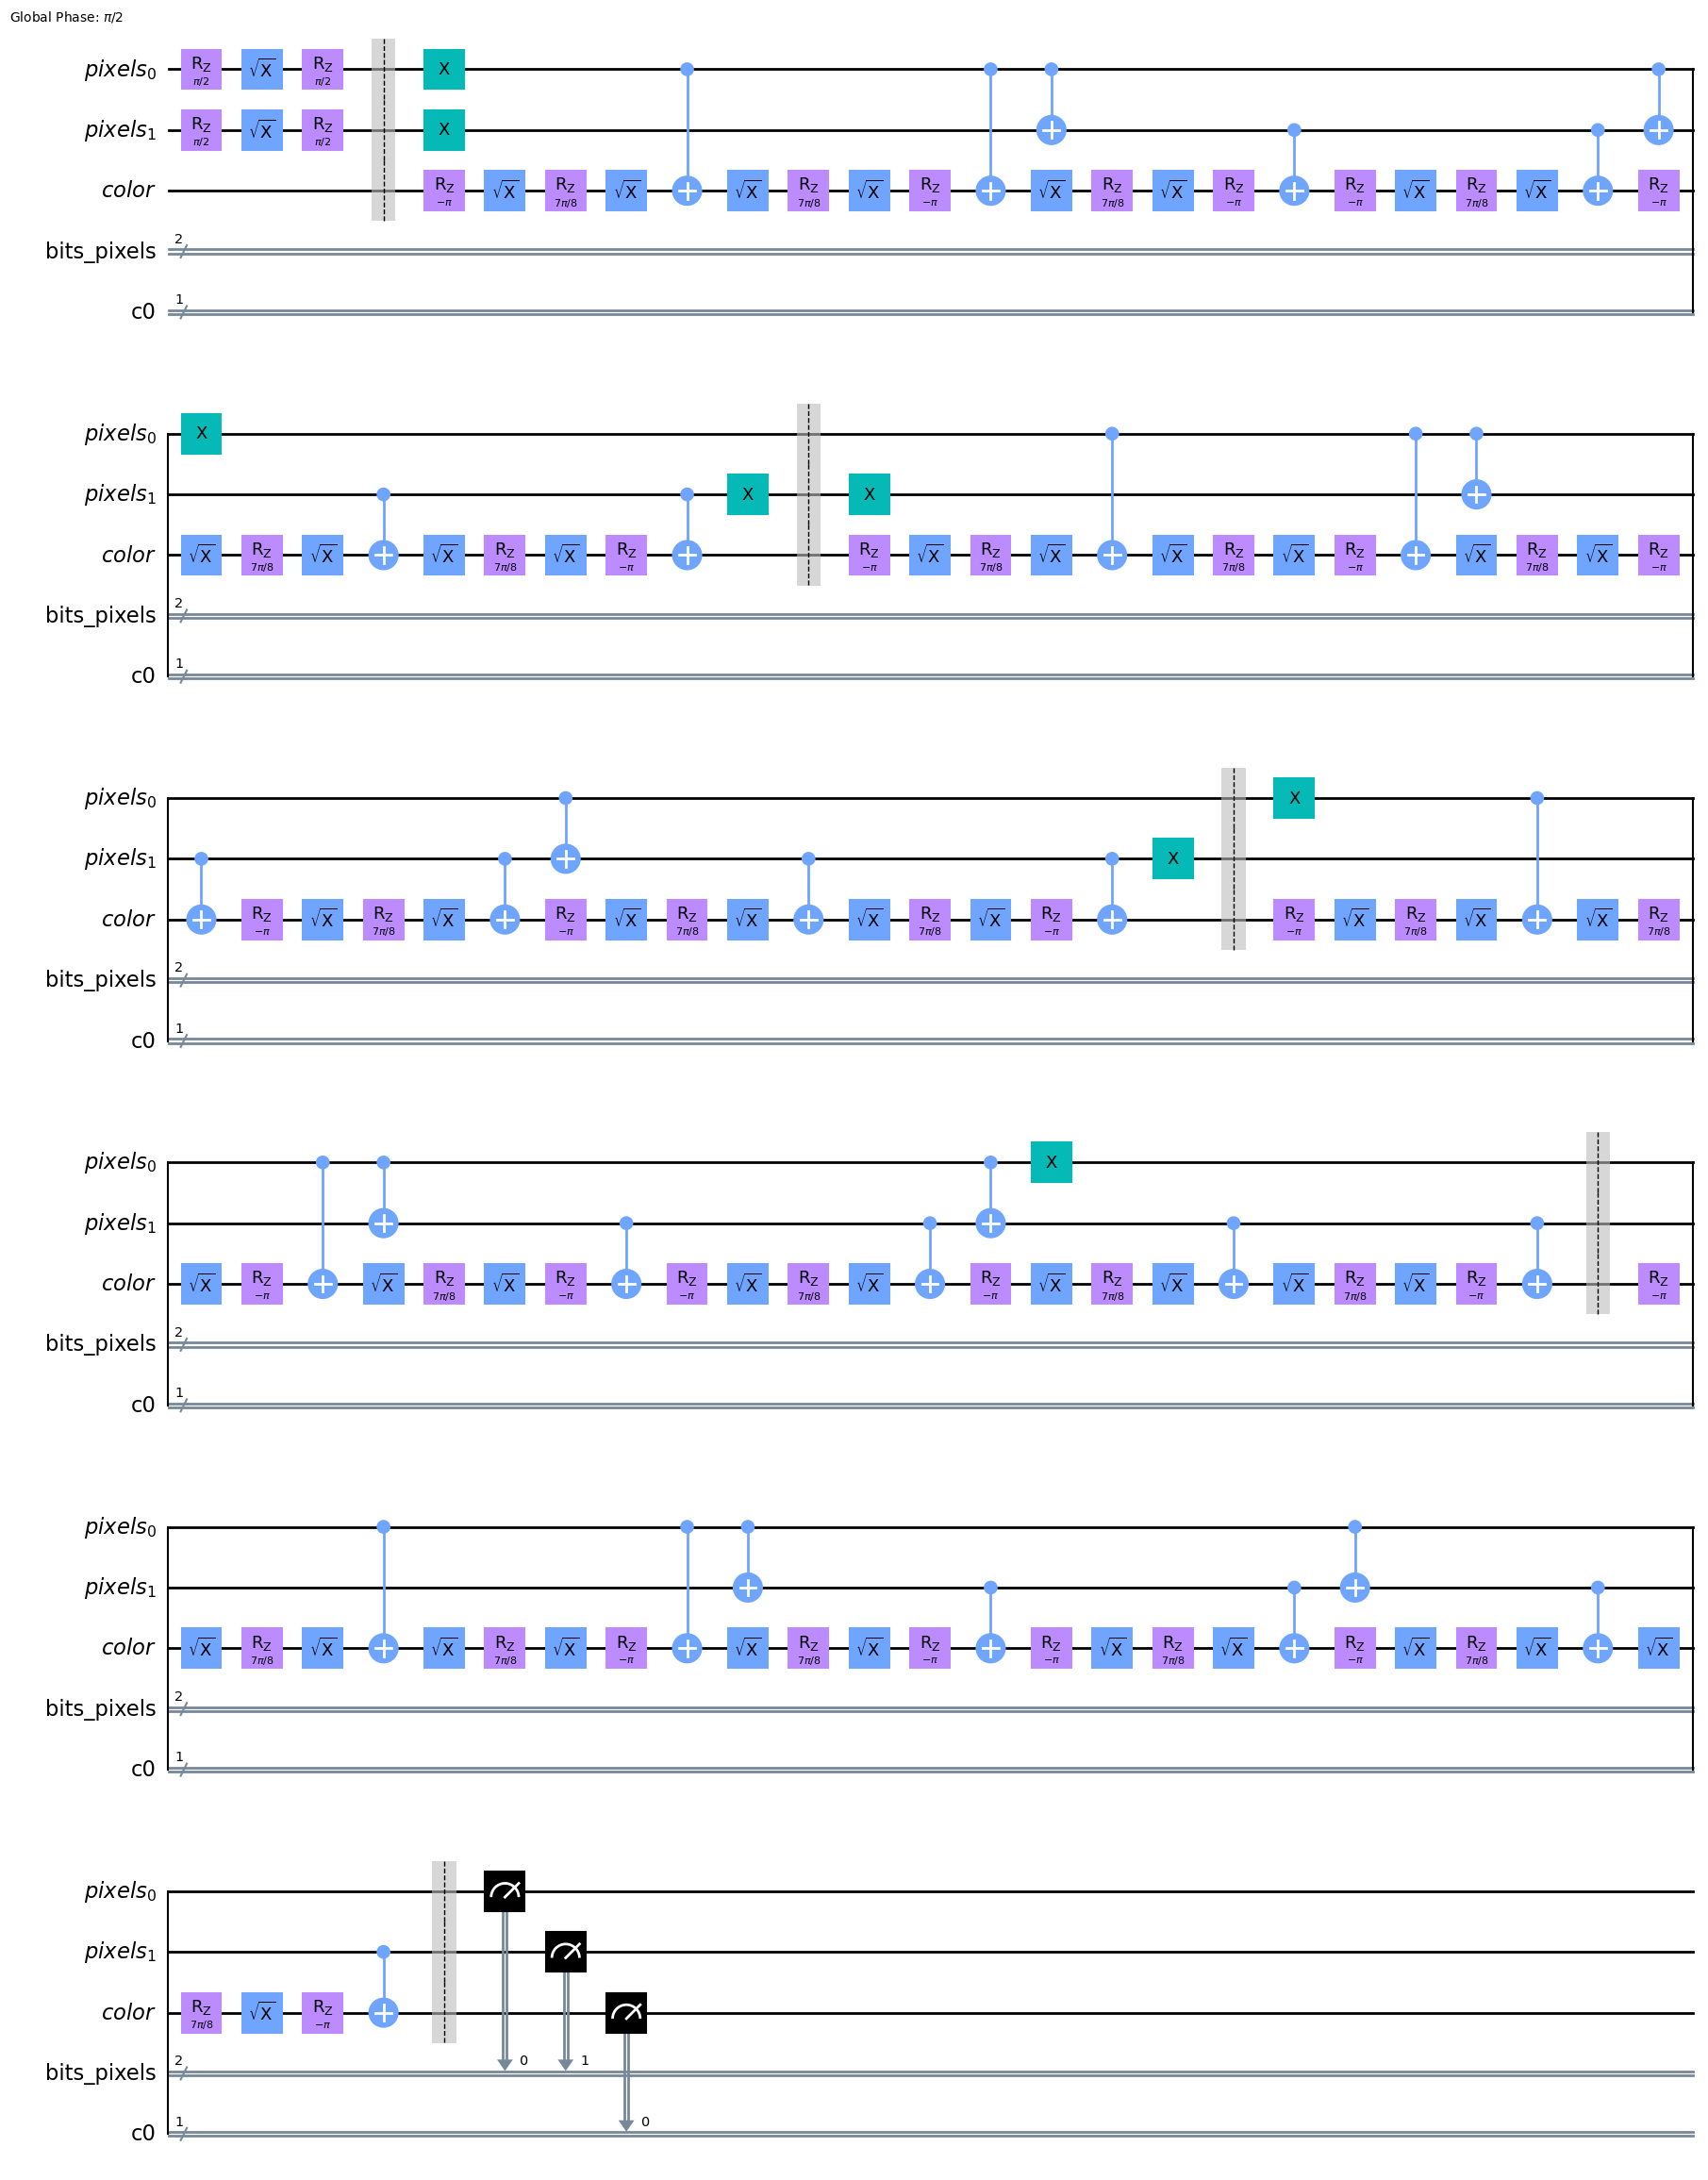

In [16]:
transpiled_qc = transpile(circuits=qc, basis_gates=["id", "x", "sx", "cx", "rz"], optimization_level=3)
transpiled_qc.draw(output="mpl")

In [17]:
print("Circuit dimensions")
print(f"Circuit depth: {transpiled_qc.depth()}")
print(f"Circuit size: {transpiled_qc.size()}")
print(f"Circuit operations: {transpiled_qc.count_ops()}")

Circuit dimensions
Circuit depth: 126
Circuit size: 145
Circuit operations: OrderedDict([('rz', 52), ('sx', 50), ('cx', 32), ('x', 8), ('barrier', 5), ('measure', 3)])


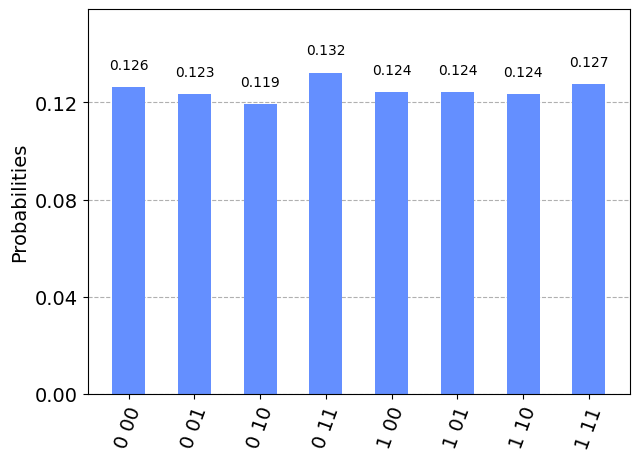

In [18]:
counts = execute(experiments=qc, backend=BACKEND, shots=SHOTS).result().get_counts()
plot_histogram(counts)

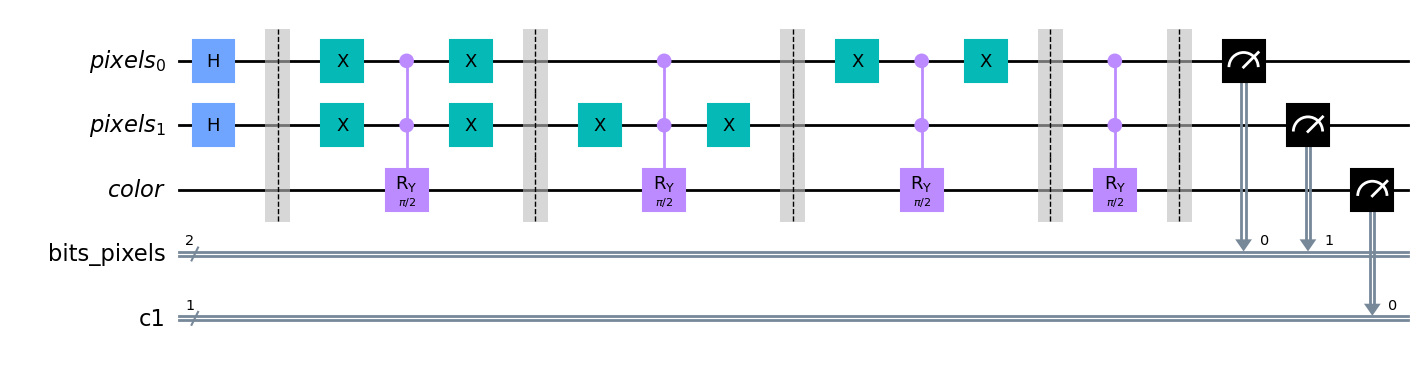

In [19]:
qubits = QuantumRegister(size=2, name="pixels")
color_qubit = QuantumRegister(size=1, name="color")
bits = ClassicalRegister(size=2, name="bits_pixels")
color_bit = ClassicalRegister(size=1)

qc = QuantumCircuit(qubits, color_qubit, bits, color_bit)

qc.h(qubit=qubits)
qc.barrier()

theta = np.pi/4

for i in range(4):
    if i == 0:
        qc.x(qubit=qubits)
    elif i == 1:
        qc.x(qubit=qubits[1])
    elif i == 2:
        qc.x(qubit=qubits[0])
    mcry = RYGate(theta=2*theta).control(num_ctrl_qubits=2)
    qc.append(mcry, qargs=[qubits[0], qubits[1], color_qubit])
    if i == 0:
        qc.x(qubit=qubits)
    elif i == 1:
        qc.x(qubit=qubits[1])
    elif i == 2:
        qc.x(qubit=qubits[0])
    qc.barrier()
     
qc.measure(qubit=qubits, cbit=bits)
qc.measure(qubit=color_qubit, cbit=color_bit)
qc.draw(output="mpl")

In [20]:
print("Circuit dimensions")
print(f"Circuit depth: {qc.depth()}")
print(f"Circuit size: {qc.size()}")
print(f"Circuit operations: {qc.count_ops()}")

Circuit dimensions
Circuit depth: 12
Circuit size: 17
Circuit operations: OrderedDict([('x', 8), ('barrier', 5), ('ccry', 4), ('measure', 3), ('h', 2)])


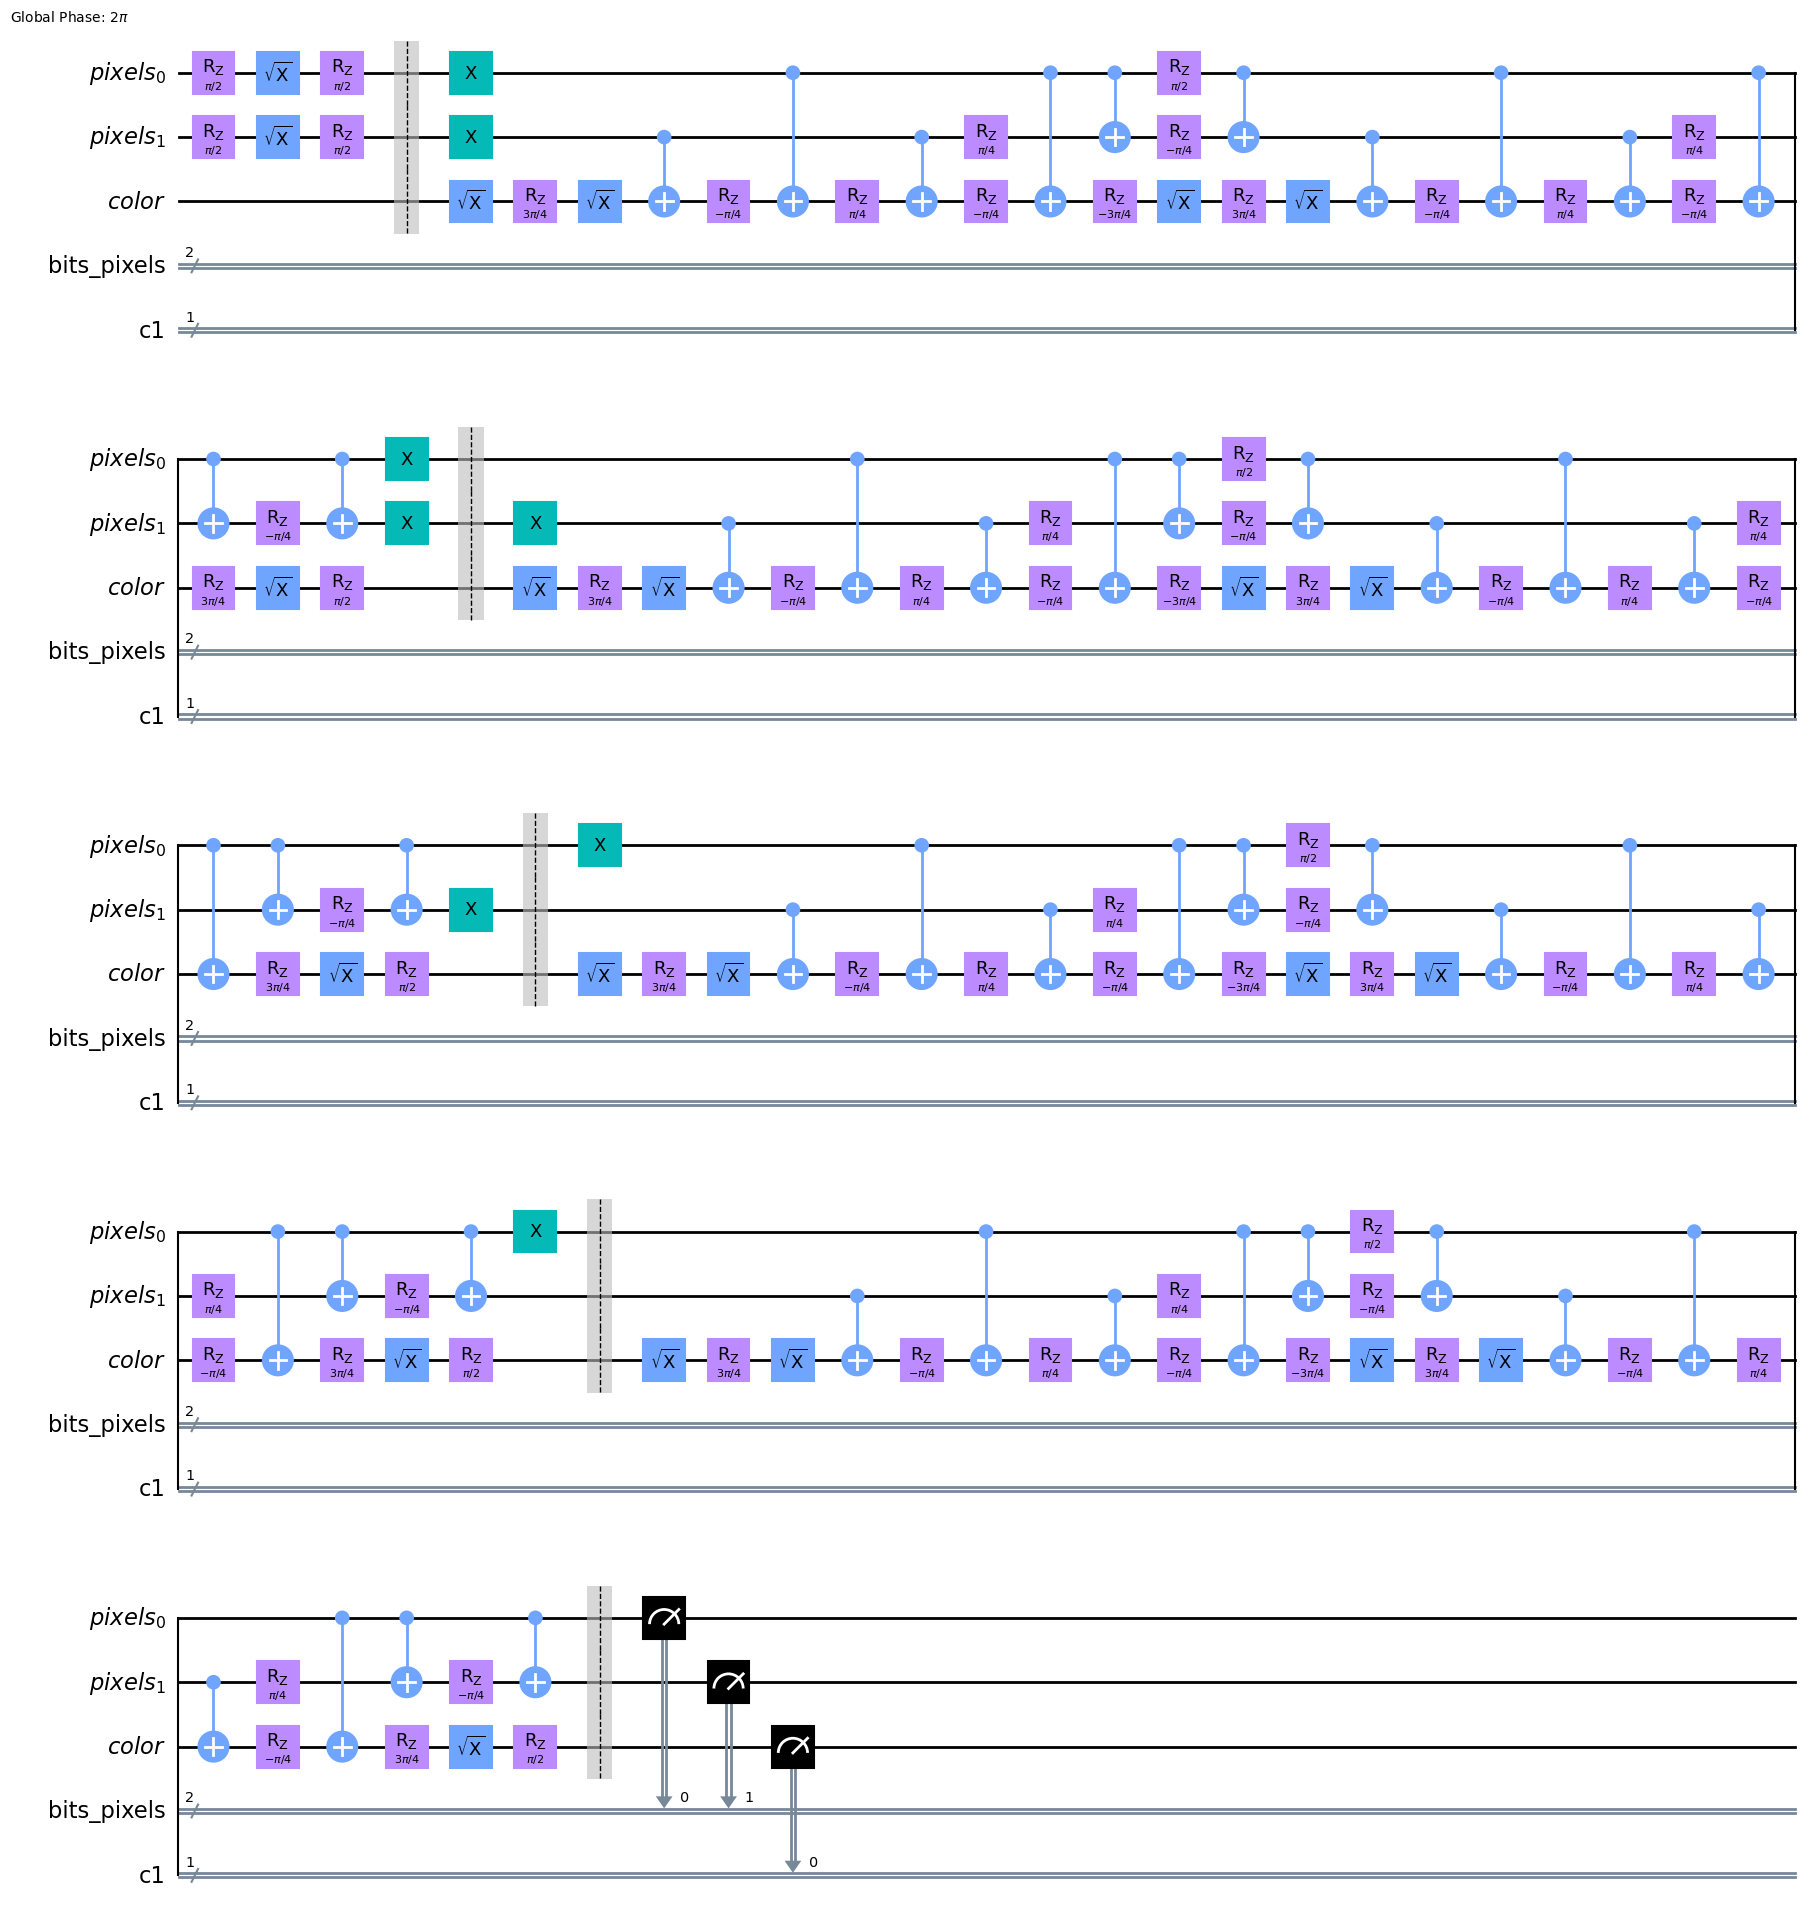

In [21]:
transpiled_qc = transpile(circuits=qc, basis_gates=["id", "x", "sx", "cx", "rz"], optimization_level=3)
transpiled_qc.draw(output="mpl")

In [22]:
print("Circuit dimensions")
print(f"Circuit depth: {transpiled_qc.depth()}")
print(f"Circuit size: {transpiled_qc.size()}")
print(f"Circuit operations: {transpiled_qc.count_ops()}")

Circuit dimensions
Circuit depth: 103
Circuit size: 149
Circuit operations: OrderedDict([('rz', 68), ('cx', 48), ('sx', 22), ('x', 8), ('barrier', 5), ('measure', 3)])


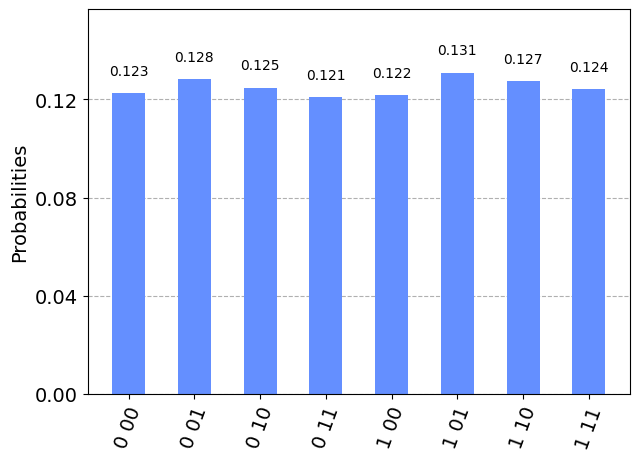

In [23]:
counts = execute(experiments=qc, backend=BACKEND, shots=SHOTS).result().get_counts()
plot_histogram(counts)

In [24]:
from fractions import Fraction

a = Fraction(2*255,90)
print(a)

17/3


In [25]:
(((127*3)/17))/90

0.24901960784313723

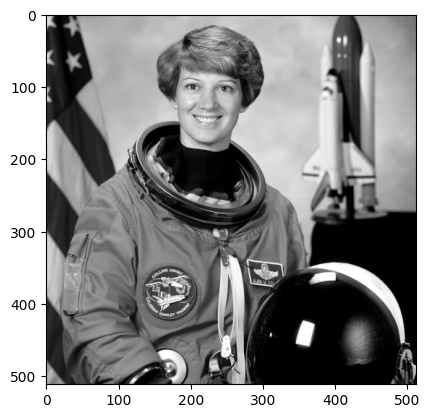

In [26]:
astronaut_gray = rgb2gray(data.astronaut())
plt.imshow(astronaut_gray, cmap="gray")

In [27]:
resized_astronaut_gray = resize(astronaut_gray, (2,2))

In [28]:
resized_astronaut_gray

array([[0.49759931, 0.56497411],
       [0.41369611, 0.29429853]])

In [29]:
pixels_intensity_list = list(resized_astronaut_gray[0]) + list(resized_astronaut_gray[1])

In [30]:
qubits = QuantumRegister(size=2, name="pixels")
color_qubit = QuantumRegister(size=1, name="color")
bits = ClassicalRegister(size=2, name="bits_pixels")
color_bit = ClassicalRegister(size=1)

qc = QuantumCircuit(qubits, color_qubit, bits, color_bit)

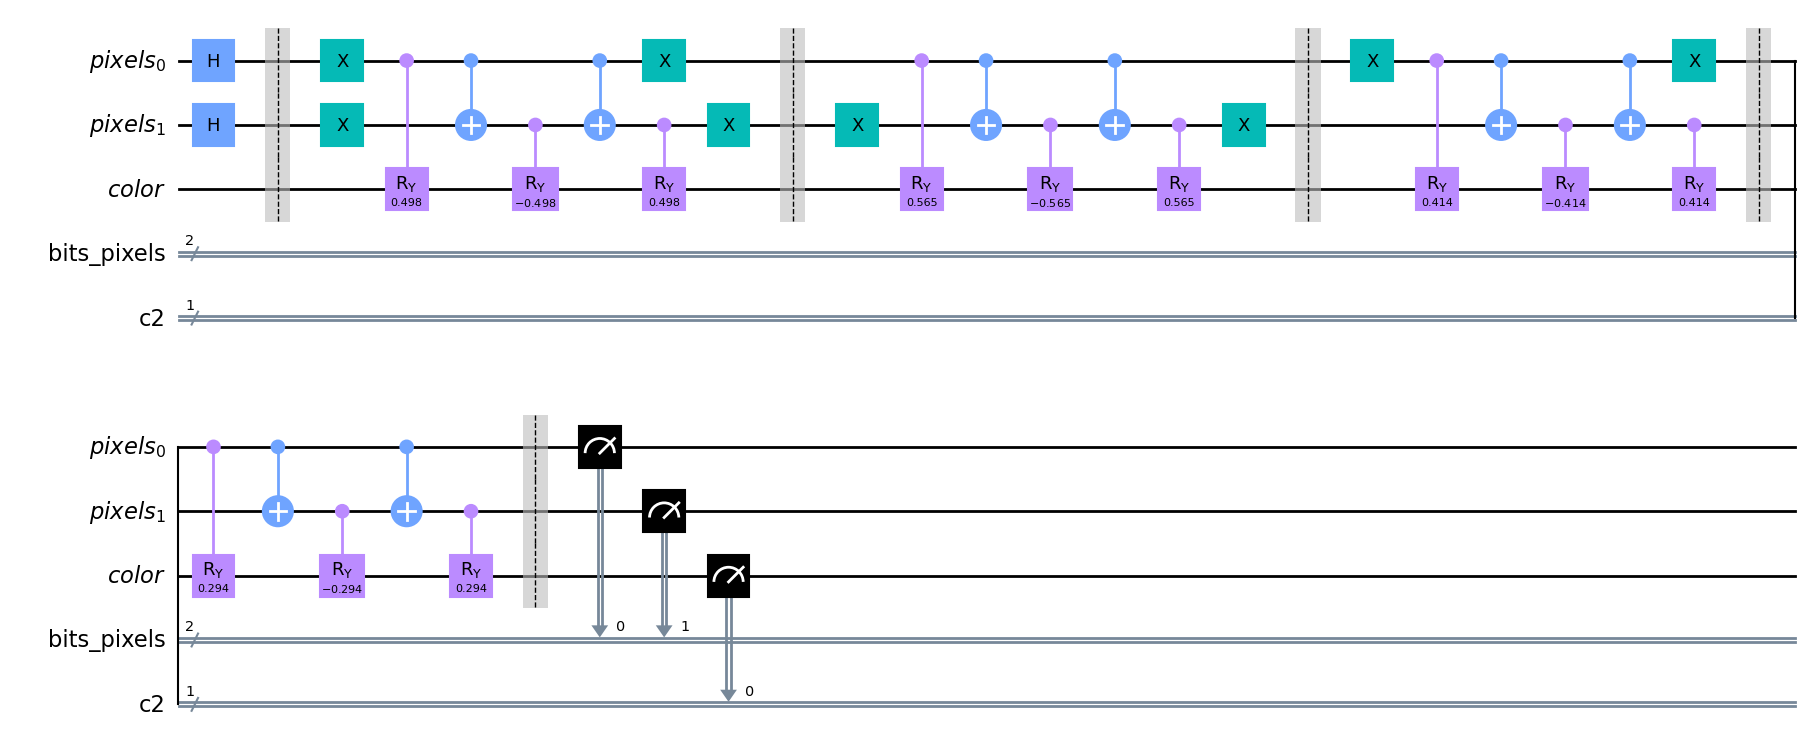

In [31]:
qc.h(qubit=qubits)
qc.barrier()

for i, pixel in enumerate(pixels_intensity_list):
    theta = ((pixel*255*12)/17)/180
    if i == 0:
        qc.x(qubit=qubits)
    elif i == 1:
        qc.x(qubit=qubits[1])
    elif i == 2:
        qc.x(qubit=qubits[0])
    qc.cry(theta=theta, control_qubit=qubits[0], target_qubit=color_qubit)
    qc.cx(control_qubit=qubits[0], target_qubit=qubits[1])
    qc.cry(theta=-theta, control_qubit=qubits[1], target_qubit=color_qubit)
    qc.cx(control_qubit=qubits[0], target_qubit=qubits[1])
    qc.cry(theta=theta, control_qubit=qubits[1], target_qubit=color_qubit)
    if i == 0:
        qc.x(qubit=qubits)
    elif i == 1:
        qc.x(qubit=qubits[1])
    elif i == 2:
        qc.x(qubit=qubits[0])
    qc.barrier()
    
qc.measure(qubit=qubits, cbit=bits)
qc.measure(qubit=color_qubit, cbit=color_bit)
qc.draw(output="mpl")

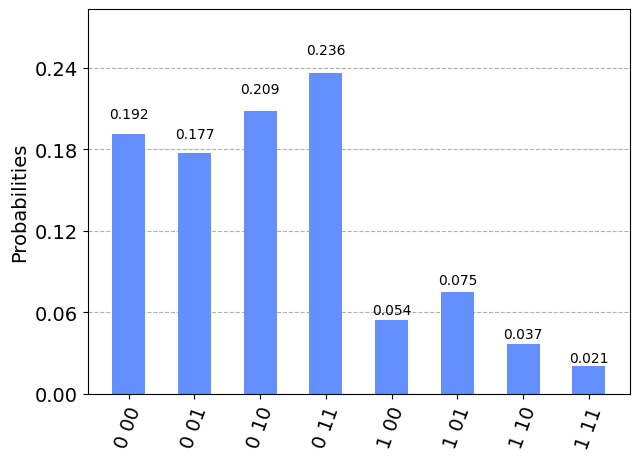

In [32]:
counts = execute(experiments=qc, backend=BACKEND, shots=SHOTS).result().get_counts()
plot_histogram(counts)

In [33]:
image = np.array([[0.5,0.5],[0.5,0.5]])
qc = image_frqi.image_quantum_circuit(image=image, measurements=True)

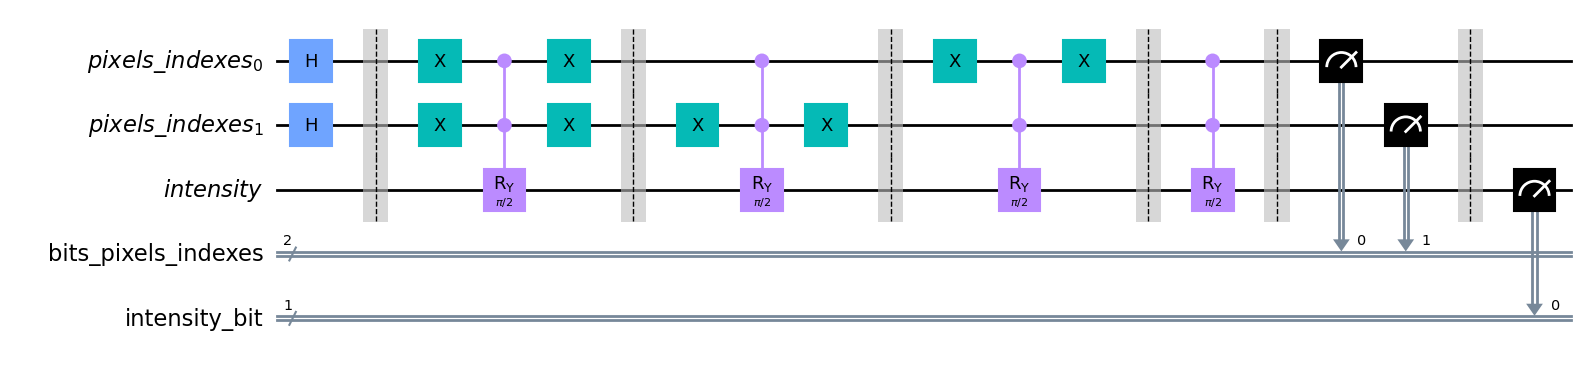

In [34]:
qc.draw(output="mpl")

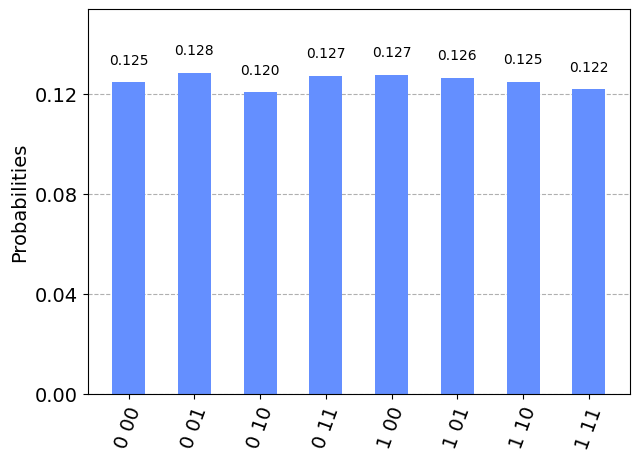

In [35]:
counts = execute(experiments=qc, backend=BACKEND, shots=SHOTS).result().get_counts()
plot_histogram(counts)

In [36]:
image = np.ones((4,4))
qc = image_frqi.image_quantum_circuit(image=image, measurements=True)

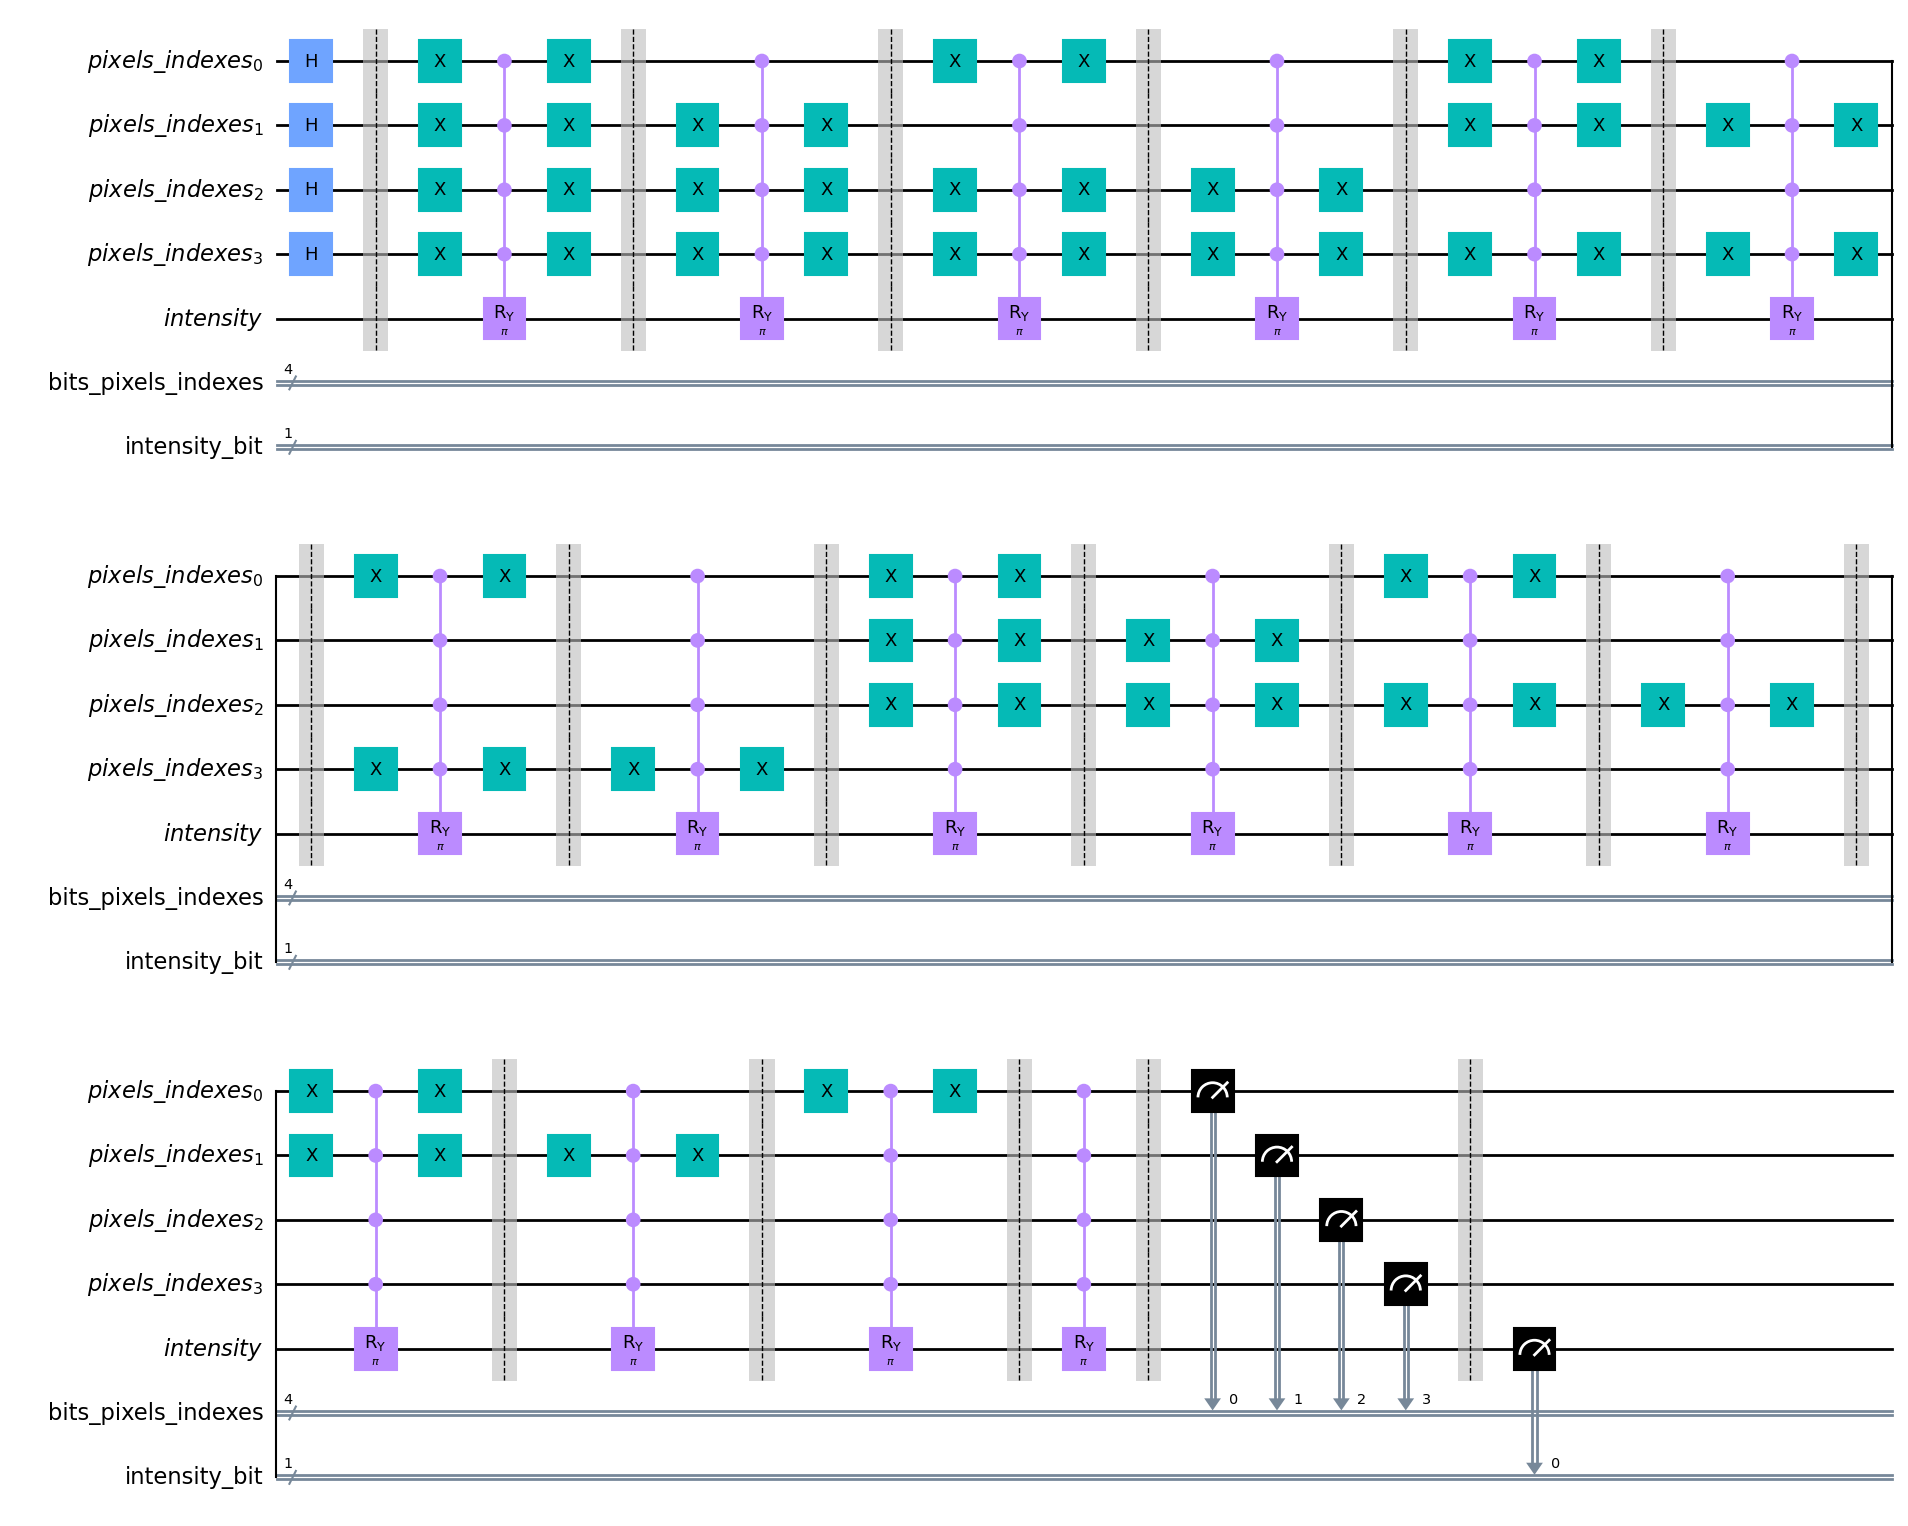

In [37]:
qc.draw(output="mpl")

In [38]:
counts = execute(experiments=qc, backend=BACKEND, shots=SHOTS).result().get_counts()
counts

{'1 0101': 499,
 '1 1101': 532,
 '1 0111': 497,
 '1 0011': 536,
 '1 0100': 521,
 '1 0110': 507,
 '1 1110': 531,
 '1 0000': 509,
 '1 1100': 497,
 '1 0001': 520,
 '1 1000': 515,
 '1 1010': 509,
 '1 1001': 510,
 '1 1011': 483,
 '1 0010': 501,
 '1 1111': 525}

In [39]:
qc = image_frqi.image_quantum_circuit(image=resized_astronaut_gray, measurements=True)

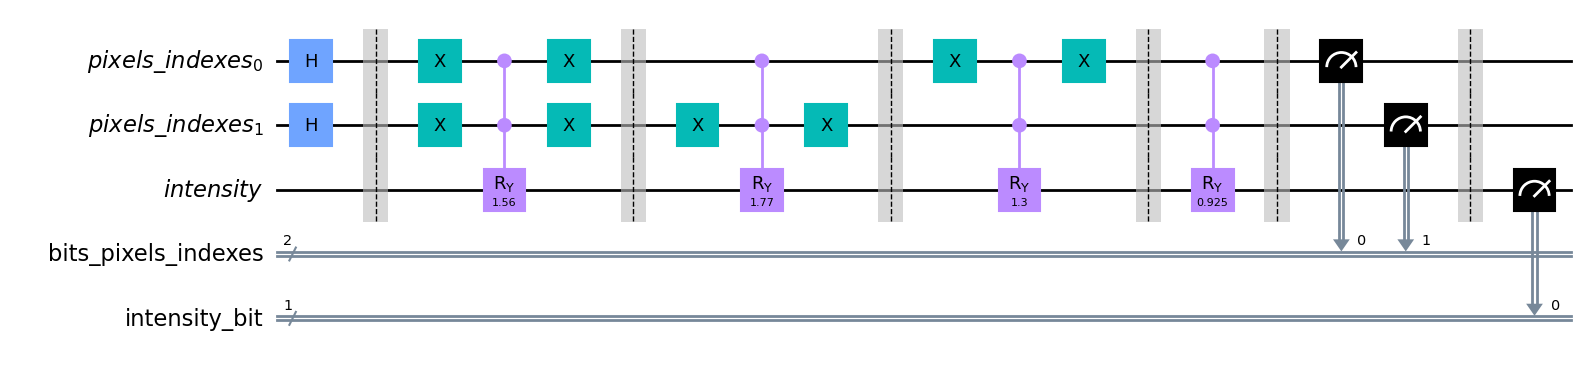

In [40]:
qc.draw(output="mpl")

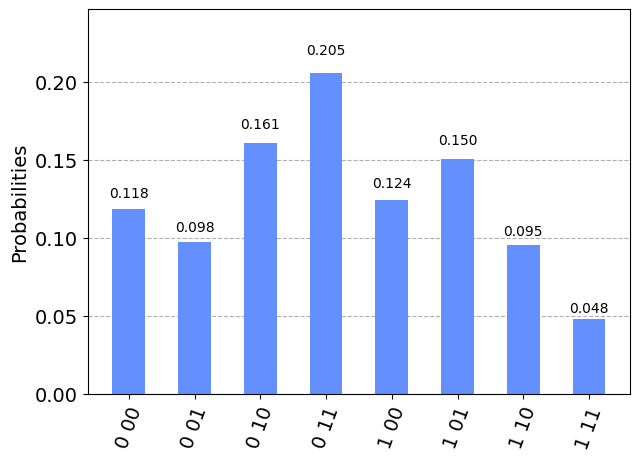

In [41]:
counts = execute(experiments=qc, backend=BACKEND, shots=SHOTS).result().get_counts()
plot_histogram(counts)

In [3]:
astronaut = data.astronaut()

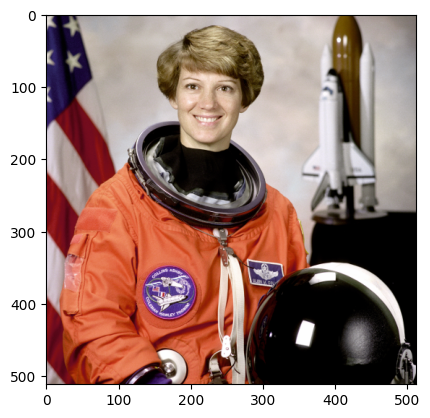

In [4]:
plt.imshow(astronaut)

In [5]:
resized_astronaut = resize(astronaut, (2,2))

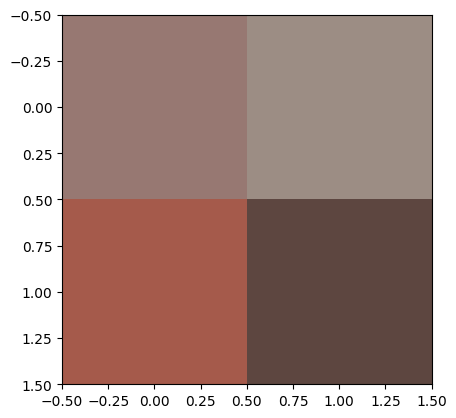

In [6]:
plt.imshow(resized_astronaut)

In [7]:
qc = image_frqi.image_quantum_circuit(image=resized_astronaut, measurements=True)

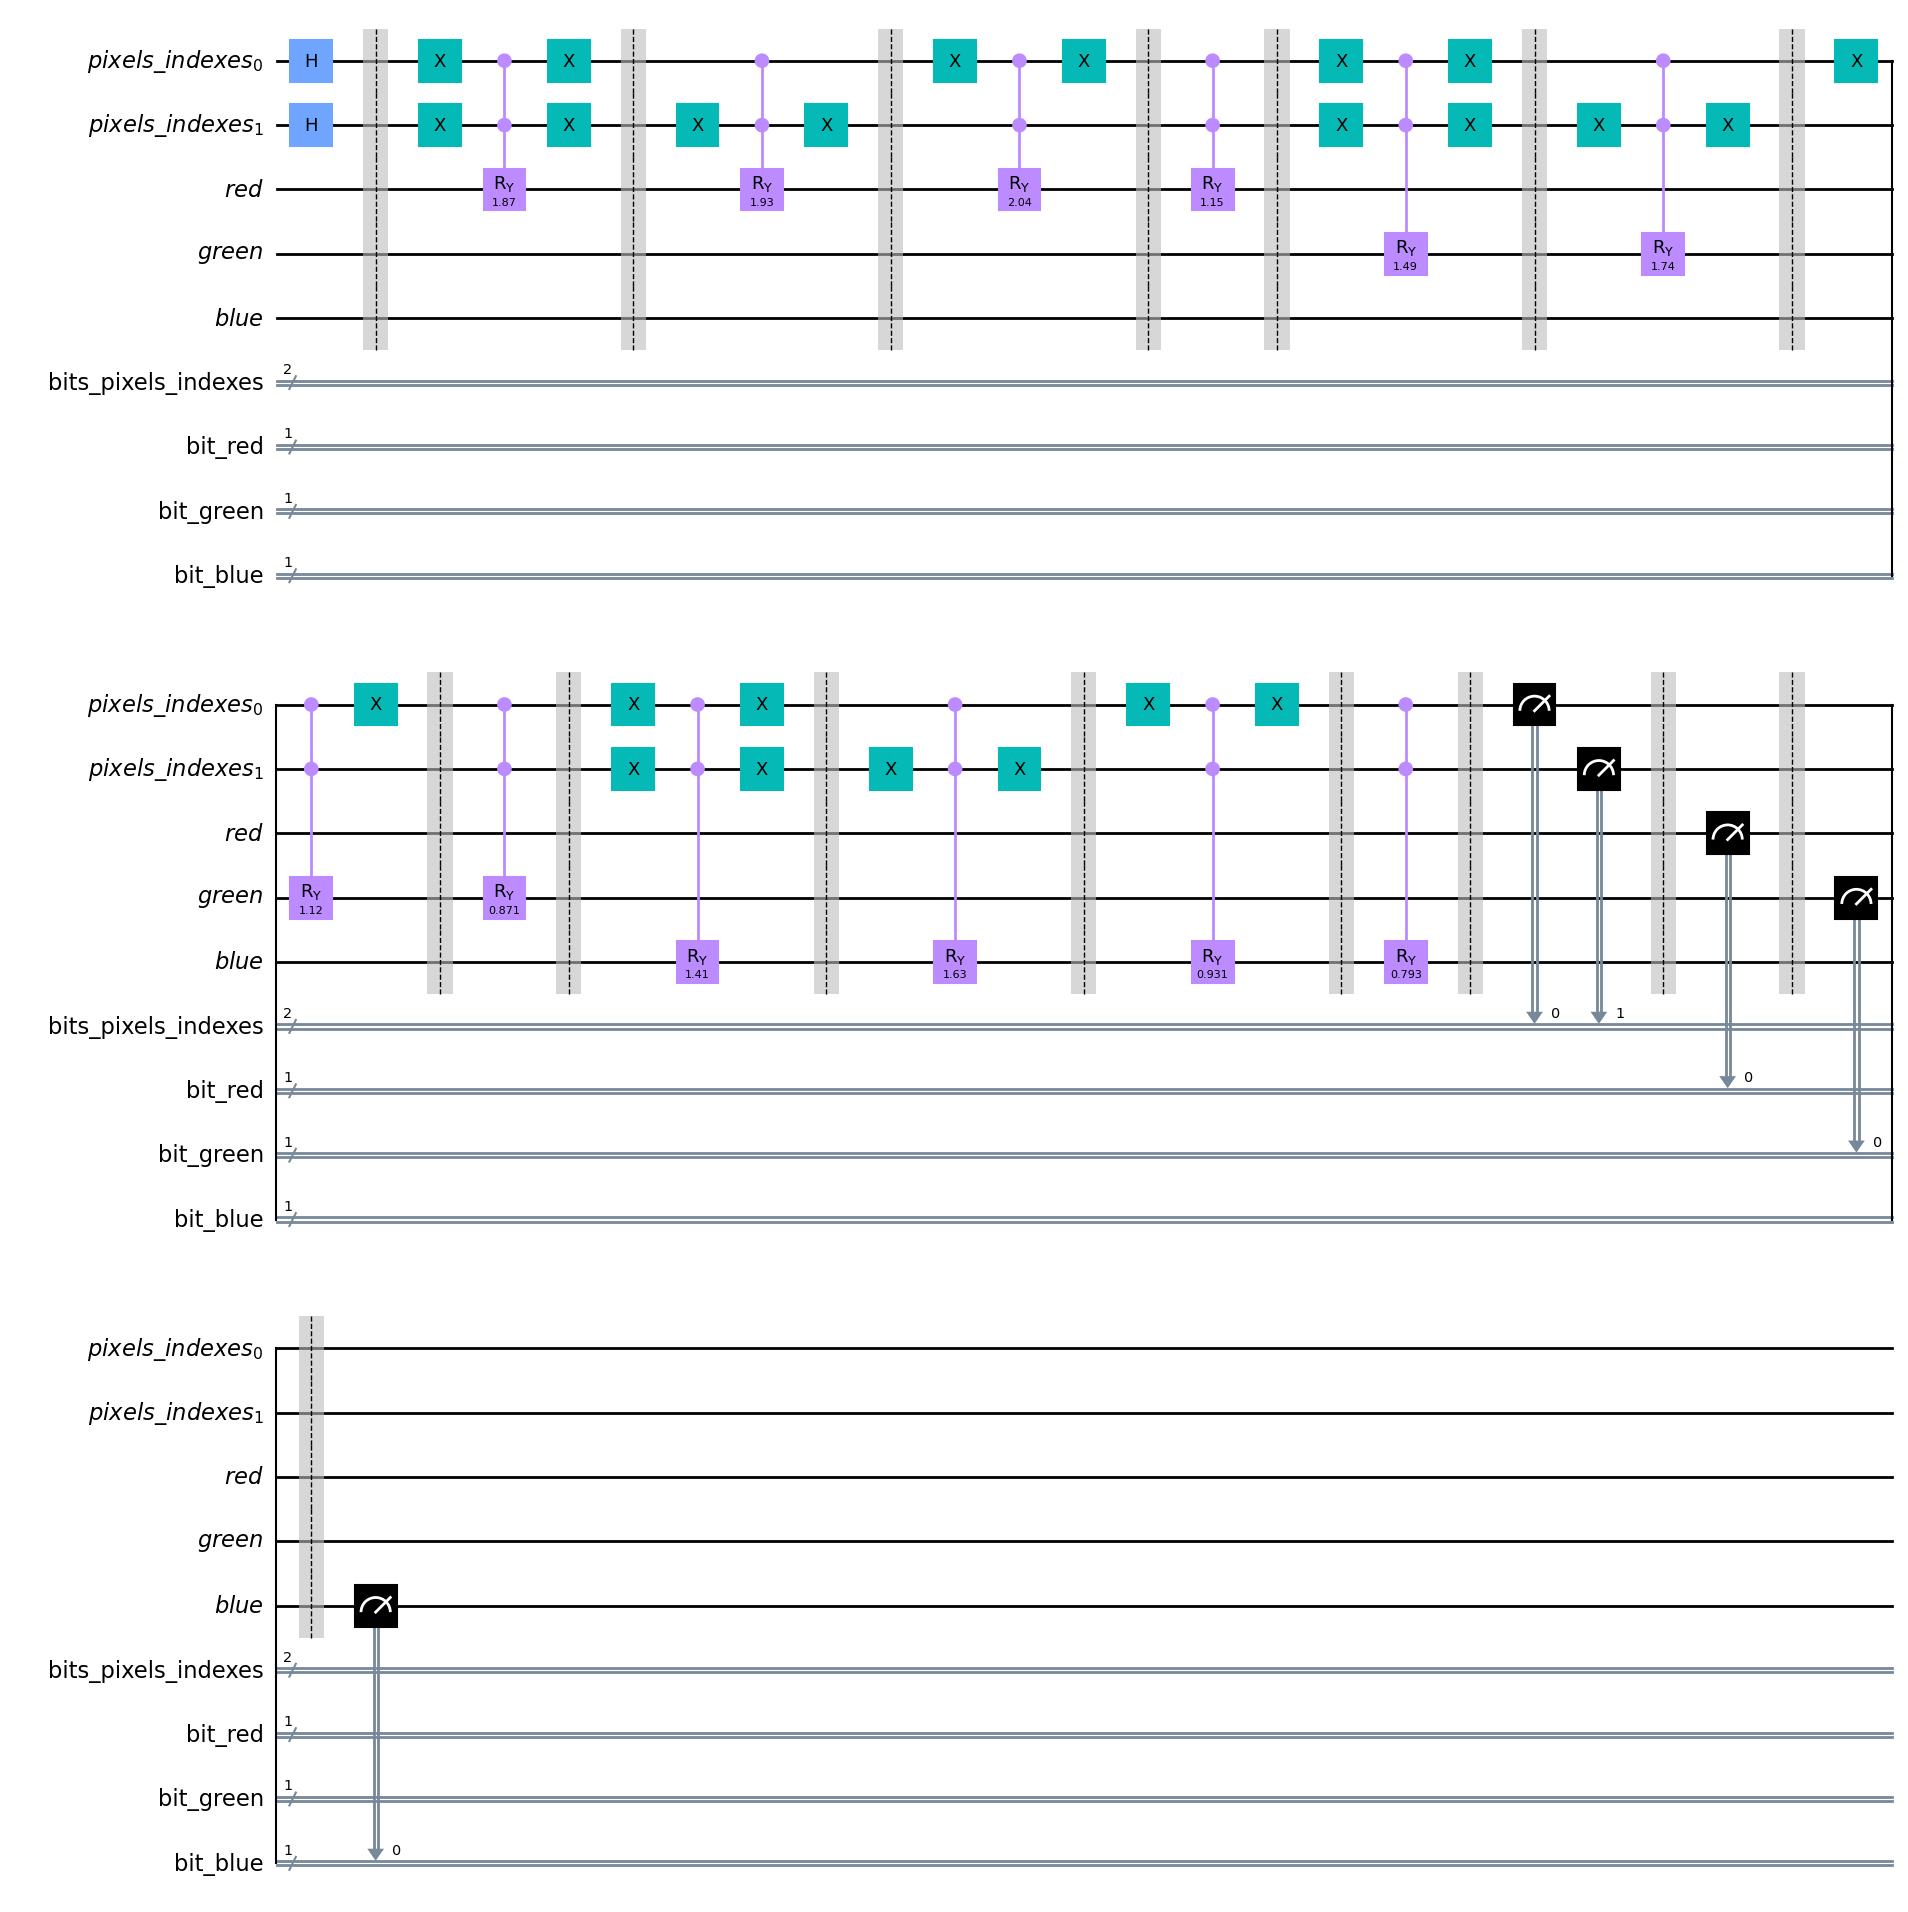

In [8]:
qc.draw(output="mpl")

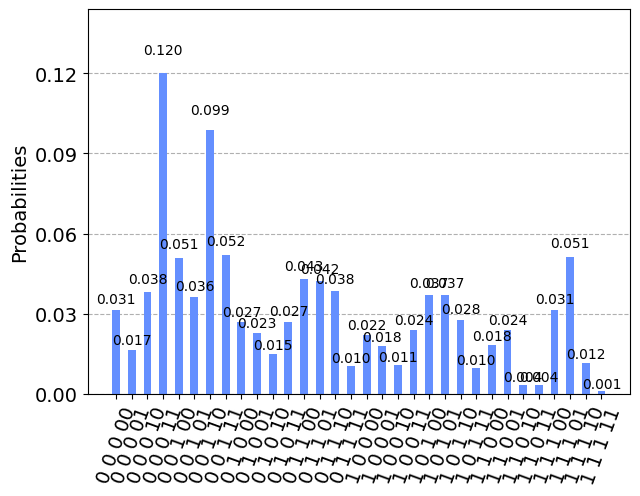

In [9]:
counts = execute(experiments=qc, backend=BACKEND, shots=SHOTS).result().get_counts()
plot_histogram(counts)

In [10]:
print("Circuit dimensions")
print(f"Circuit depth: {qc.depth()}")
print(f"Circuit size: {qc.size()}")
print(f"Circuit operations: {qc.count_ops()}")

Circuit dimensions
Circuit depth: 35
Circuit size: 43
Circuit operations: OrderedDict([('x', 24), ('barrier', 16), ('ccry', 12), ('measure', 5), ('h', 2)])
